# Imports & Notes to Improve Workflow

In [1]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline
# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np
# Libraries to aid in web scraping
import requests
import json
import re
from bs4 import BeautifulSoup
from datetime import datetime
import seaborn as sns;
#Notes for efficienccy:
#shift + tab when cursor is in arguments to bring up its documentation
#ex: pd.DataFrame(Shift+tab here)
#recall: Json == Dictionary
#to know functions of pandas:
#dir(pd)

# Reading The Data

In [2]:
# using pandas and read_csv()
acquis = pd.read_csv("datasets/startups/acquisitions.csv")
additions = pd.read_csv("datasets/startups/additions.csv")
companies = pd.read_csv("datasets/startups/companies.csv")
invests = pd.read_csv("datasets/startups/investments.csv")
rounds = pd.read_csv("datasets/startups/rounds.csv")
dfAll = [acquis, additions, companies, invests, rounds]

In [4]:
#shapes (rows x cols) of each dataset
for ele in dfAll:
    print(ele.shape)

(18969, 18)
(2213, 4)
(66368, 14)
(168647, 18)
(114949, 12)


# Samples of the datasets

In [5]:
acquis.sample(5).transpose()

,5567,8173,10904,4660,15737
company_permalink,/organization/energent,/organization/informative-design-partners-idp,/organization/mountain-states-networking,/organization/del-mar-datatrac,/organization/spreedly-subscriptions
company_name,Energent,Informative Design Partners (IDP),Mountain States Networking,Del Mar DataTrac,Spreedly Subscriptions
company_category_list,NaN,Hardware + Software,NaN,Point of Sale|Services|Software,NaN
company_country_code,NaN,USA,USA,USA,NaN
company_state_code,NaN,VA,UT,CA,NaN
company_region,NaN,"Washington, D.C.",Salt Lake City,San Diego,NaN
company_city,NaN,Charlottesville,Salt Lake City,San Diego,NaN
acquirer_permalink,/organization/rodan-energy-solutions,/organization/rand-worldwide,/organization/convergeone,/organization/ellie-mae,/organization/pin-payments
acquirer_name,Rodan Energy Solutions,RAND Worldwide,ConvergeOne,Ellie Mae,Pin Payments
acquirer_category_list,NaN,Consulting|Software|Technology,Enterprise Software,Automated Kiosk|E-Commerce|SaaS|Software,Accounting|Developer APIs|Payments|Software


In [6]:
additions.sample(5).transpose()

,56,1020,1321,1150,1731
content,Acquisitions,Profiles: People,Rounds: angel,Profiles: Products,Rounds: post_ipo_equity
month_str,1995-11,2013-09,2012-10,2015-11,2014-02
year_str,1995,2013,2012,2015,2014
value,1,10738,48,1993,35


In [7]:
companies.sample(5).transpose()

,50845,58164,15385,14024,58104
permalink,/organization/setvi,/organization/tico-network-llp,/organization/detectify,/organization/crunch-data,/organization/tianji
name,SETVI,TICO NETWORK LLP,Detectify,Crunch Data,Tianji
homepage_url,http://www.setvi.com/,http://thetico.com/,http://www.detectify.com,http://www.crunch-data.com,http://www.tianji.com
category_list,Software,Taxis|Transportation|Travel|Travel & Tourism,Security,Business Services|Design|Mechanical Solutions,Social Media
funding_total_usd,350000,190000,1700000,40000,32000000
status,operating,operating,operating,operating,operating
country_code,USA,NaN,SWE,USA,CHN
state_code,PA,NaN,26,CO,22
region,Philadelphia,NaN,Stockholm,Denver,Beijing
city,Newtown Square,NaN,Stockholm,Denver,Beijing


In [8]:
invests.sample(5).transpose()

,156473,92539,44095,59865,134058
company_permalink,/organization/versura,/organization/molecular-templates,/organization/dwolla,/organization/glycode,/organization/smilebox
company_name,Versura,Molecular Templates,Dwolla,Glycode,Smilebox
company_category_list,Education|Online Identity|Service Providers,Biotechnology|Health and Wellness|Health Care,Accounting|Mobile Payments|Software|Virtualiza...,Biotechnology,Consumer Internet
company_country_code,NaN,USA,USA,FRA,USA
company_state_code,NaN,TX,IA,B1,WA
company_region,NaN,Austin,Des Moines,FRA - Other,Seattle
company_city,NaN,Georgetown,Des Moines,Uzerche,Redmond
investor_permalink,/organization/general-electric-pension-trust,/organization/sante-ventures,/organization/cme-group,/organization/limousin-participations,/organization/bessemer-venture-partners
investor_name,General Electric Pension Trust,Sante Ventures,CME Group,Limousin Participations,Bessemer Venture Partners
investor_country_code,USA,USA,USA,NaN,USA


In [9]:
rounds.sample(5).transpose()

,95351,46355,64518,14667,68102
company_permalink,/organization/stratuslive,/organization/ii4b,/organization/mu-dynamics,/organization/bramasol,/organization/ninja-blocks
company_name,StratusLIVE,ii4b,Mu Dynamics,Bramasol,Ninja Blocks
company_category_list,Software,Facebook Applications|Finance,Web Hosting,Software,Developer APIs|Home Automation|Internet of Thi...
company_country_code,USA,POL,USA,USA,USA
company_state_code,VA,78,CA,CA,MN
company_region,Norfolk - Virginia Beach,Warsaw,SF Bay Area,SF Bay Area,Duluth
company_city,Virginia Beach,Warsaw,Sunnyvale,South San Francisco,Eveleth
funding_round_permalink,/funding-round/3460f74156848f03832c392a09f904ae,/funding-round/51b7f404b9145b0719de48fc62274ef2,/funding-round/b566add9d56691fc7e99d5c351675a05,/funding-round/d07adfa6b78e5b977293cadd556eabc8,/funding-round/a405bd4921fd04180fb2c8d862f730c4
funding_round_type,private_equity,seed,venture,debt_financing,undisclosed
funding_round_code,NaN,NaN,B,NaN,NaN


# Seeing the columns in the datasets

In [3]:
def datasetsCols(dfList, datasetNames, pad=""):
    """
    Takes dataframes and returns a dataframe (df) with each column having a df's
    column names. The "pad" is to make sure all lists of columns have 
    the same length padded out with "pad"
    Example
    pad = "XX", datasetNames = ["cars", "planes"]
    dfList = [carsDF, planesDF]
    returned data frame:
            cars            planes
    0       numOfWheels     numOfWings
    1       manufacturer    manufacturer
    2       make            XX
    """
    cols = []
    maxArrayLen = 0
    for i, df in enumerate(dfList):
        cols.append(df.columns.tolist())
        maxArrayLen = max(maxArrayLen, len(cols[i]))
    
    dictCsvs = {}
    for i, df in enumerate(dfList):
        cols[i] += [pad] * (maxArrayLen - len(cols[i])) #padding the lists to make them have equal lengths 
        dictCsvs.update({datasetNames[i] : cols[i]})

    return pd.DataFrame(dictCsvs)

In [4]:
lstCsvNames = ["acquisitions", "additions", "companies", "investments", "rounds"]

dfAllCols = datasetsCols(dfAll, lstCsvNames)
dfAllCols

,acquisitions,additions,companies,investments,rounds
0,company_permalink,content,permalink,company_permalink,company_permalink
1,company_name,month_str,name,company_name,company_name
2,company_category_list,year_str,homepage_url,company_category_list,company_category_list
3,company_country_code,value,category_list,company_country_code,company_country_code
4,company_state_code,,funding_total_usd,company_state_code,company_state_code
5,company_region,,status,company_region,company_region
6,company_city,,country_code,company_city,company_city
7,acquirer_permalink,,state_code,investor_permalink,funding_round_permalink
8,acquirer_name,,region,investor_name,funding_round_type
9,acquirer_category_list,,city,investor_country_code,funding_round_code


# Data Cleaning

First, lets change the columns in the `companies` dataset <br>
to be the similar to all other datasets: <br>
(we're doing this in case we merge the datasets together, we want them to have the same column names)

In [5]:
companies.rename(columns = {'permalink' : 'company_permalink', 
                            'name' : 'company_name',
                            'category_list' : 'company_category_list',
                            'country_code' : 'company_country_code',
                            'state_code' : 'company_state_code',
                            'region' : 'company_region',
                            'city' : 'company_city'}, inplace = True)

In [6]:
dfAll[2] = companies
dfAllCols = datasetsCols(dfAll, lstCsvNames)
dfAllCols

,acquisitions,additions,companies,investments,rounds
0,company_permalink,content,company_permalink,company_permalink,company_permalink
1,company_name,month_str,company_name,company_name,company_name
2,company_category_list,year_str,homepage_url,company_category_list,company_category_list
3,company_country_code,value,company_category_list,company_country_code,company_country_code
4,company_state_code,,funding_total_usd,company_state_code,company_state_code
5,company_region,,status,company_region,company_region
6,company_city,,company_country_code,company_city,company_city
7,acquirer_permalink,,company_state_code,investor_permalink,funding_round_permalink
8,acquirer_name,,company_region,investor_name,funding_round_type
9,acquirer_category_list,,company_city,investor_country_code,funding_round_code


Let's start by analyzing `additions` dataset, as it has unusual format of columns

## Removing "additions" Dataset

In [14]:
additions.sample(5)

,content,month_str,year_str,value
467,IPOs,1993-08,1993,7
1764,Rounds: private_equity,2009-02,2009,2
1962,Rounds: seed,2011-09,2011,124
862,Profiles: Organizations,2009-03,2009,976
1594,Rounds: grant,2011-11,2011,9


In [15]:
additions["content"].unique()

array(['Acquisitions', 'IPOs', 'Profiles', 'Profiles: Organizations',
       'Profiles: People', 'Profiles: Products', 'Rounds',
       'Rounds: angel', 'Rounds: convertible_note',
       'Rounds: debt_financing', 'Rounds: equity_crowdfunding',
       'Rounds: grant', 'Rounds: non_equity_assistance',
       'Rounds: post_ipo_debt', 'Rounds: post_ipo_equity',
       'Rounds: private_equity', 'Rounds: product_crowdfunding',
       'Rounds: secondary_market', 'Rounds: seed', 'Rounds: undisclosed',
       'Rounds: venture'], dtype=object)

In [16]:
dfAllCols

,acquisitions,additions,companies,investments,rounds
0,company_permalink,content,company_permalink,company_permalink,company_permalink
1,company_name,month_str,company_name,company_name,company_name
2,company_category_list,year_str,homepage_url,company_category_list,company_category_list
3,company_country_code,value,company_category_list,company_country_code,company_country_code
4,company_state_code,,funding_total_usd,company_state_code,company_state_code
5,company_region,,status,company_region,company_region
6,company_city,,company_country_code,company_city,company_city
7,acquirer_permalink,,company_state_code,investor_permalink,funding_round_permalink
8,acquirer_name,,company_region,investor_name,funding_round_type
9,acquirer_category_list,,company_city,investor_country_code,funding_round_code


In [17]:
additions.shape

(2213, 4)

In [18]:
companies.shape, rounds.shape

((66368, 14), (114949, 12))

So apparently there are no columns that could be used to join with the other datasets. <br>
Furthermore, the "value" column is too vague to be useful. <br>
Therefore, the "additions" dataset will be discarded.

In [19]:
dfAll.pop(1)
lstCsvNames.pop(1)
len(dfAll), lstCsvNames

(4, ['acquisitions', 'companies', 'investments', 'rounds'])

## `rounds` Dataset

In [20]:
dfAllCols.iloc[:, -2:]

,investments,rounds
0,company_permalink,company_permalink
1,company_name,company_name
2,company_category_list,company_category_list
3,company_country_code,company_country_code
4,company_state_code,company_state_code
5,company_region,company_region
6,company_city,company_city
7,investor_permalink,funding_round_permalink
8,investor_name,funding_round_type
9,investor_country_code,funding_round_code


In [21]:
invests.shape, rounds.shape

((168647, 18), (114949, 12))

In [22]:
invests.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3/19/2008,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,7/24/2014,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,7/1/2014,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,11/9/2015,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,5/22/2013,3000000.0


In [23]:
rounds.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,1/5/2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,10/14/2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,3/1/2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,1/30/2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3/19/2008,2000000.0


In [24]:
len(invests["company_name"].unique()), len(rounds["company_name"].unique())

(44579, 66103)

Since there are companies in `rounds` dataset that are not in `investments` dataset, <br>
therefore we should keep `rounds` dataset for further analysis.

# Data Cleaning (Cont.)

## Checking All Missing Values

In [7]:
def datasetsNulls(dfList, datasetNames, nullCol="nulls_", pad=""):
    """
    Use this when you want to display a column of column names,
    then a column of the null values, and repeat that for each dataset.
    Returns a dataframe
    """
    cols = []
    nulls = []
    maxArrayLen = 0
    for i, df in enumerate(dfList):
        cols.append(df.columns.tolist())
        nulls.append(df.isnull().sum().tolist())
        maxArrayLen = max(maxArrayLen, len(cols[i]))
    
    dictCsvs = {}
    for i, df in enumerate(dfList):
        cols[i] += [pad] * (maxArrayLen - len(cols[i])) #padding the lists to make them have equal lengths 
        nulls[i] += [None] *  (maxArrayLen - len(nulls[i]))
        dictCsvs[datasetNames[i]] = cols[i]
        dictCsvs[nullCol + str(i+1)] = nulls[i]
    
    return pd.DataFrame(dictCsvs)

In [26]:
dfAllNulls = datasetsNulls(dfAll, lstCsvNames)
dfAllNulls

,acquisitions,nulls_1,companies,nulls_2,investments,nulls_3,rounds,nulls_4
0,company_permalink,0,company_permalink,0.0,company_permalink,0,company_permalink,0.0
1,company_name,1,company_name,1.0,company_name,1,company_name,1.0
2,company_category_list,4984,homepage_url,5058.0,company_category_list,3632,company_category_list,3410.0
3,company_country_code,4669,company_category_list,3148.0,company_country_code,10521,company_country_code,8678.0
4,company_state_code,4949,funding_total_usd,0.0,company_state_code,13431,company_state_code,10946.0
5,company_region,4911,status,0.0,company_region,12485,company_region,10167.0
6,company_city,4911,company_country_code,6958.0,company_city,12483,company_city,10164.0
7,acquirer_permalink,1,company_state_code,8547.0,investor_permalink,12,funding_round_permalink,0.0
8,acquirer_name,1,company_region,8030.0,investor_name,12,funding_round_type,0.0
9,acquirer_category_list,2389,company_city,8028.0,investor_country_code,30939,funding_round_code,83809.0


### `dropna()` for columns with few missing values

Notice that there is one row that doesn't contain a company name, <br>
so let's validate that it is the same company across all datasets, <br>
so we can remove it:

In [8]:
datasetsCols(dfAll, lstCsvNames)

,acquisitions,additions,companies,investments,rounds
0,company_permalink,content,company_permalink,company_permalink,company_permalink
1,company_name,month_str,company_name,company_name,company_name
2,company_category_list,year_str,homepage_url,company_category_list,company_category_list
3,company_country_code,value,company_category_list,company_country_code,company_country_code
4,company_state_code,,funding_total_usd,company_state_code,company_state_code
5,company_region,,status,company_region,company_region
6,company_city,,company_country_code,company_city,company_city
7,acquirer_permalink,,company_state_code,investor_permalink,funding_round_permalink
8,acquirer_name,,company_region,investor_name,funding_round_type
9,acquirer_category_list,,company_city,investor_country_code,funding_round_code


In [9]:
#company_permalink of each row that doesn't have a company name:
for df in dfAll:
    print(df[df['company_name'].isnull()]['company_permalink'].values)

['mendatio"']


KeyError: 'company_name'

So apparently, the `acquisitions` dataset has a different permalink that has no company name, <br>
So we could remove these two companies, as the total number of companies are big enough to get the insight that we want.

`dfAllNulls` dataframe also shows that there are missing values for `acquirer_name` and `investor_name` <br>
which can't be imputed, so we'll also remove them.

Finally, we'll remove the missing values for columns that have less than 100 `NaN`, <br>
as they're small in comparison to their respective datasets:

In [29]:
# This syntax won't work, as it turns out, df[0] is a copy of a dataframe (eg: a copy of acquisitions, so they don't share the same reference)
#for df in dfAll:
#    nulls = df.isnull().sum()
#    cols = nulls[(nulls <= 100) & (nulls != 0)].index.tolist()
#    df.dropna(subset=cols, inplace=True)
#dfAllNulls = datasetsNulls(dfAll, lstCsvNames)
#dfAllNulls

In [10]:
nulls = acquis.isnull().sum()
cols = nulls[(nulls <= 100) & (nulls != 0)].index.tolist()
acquis.dropna(subset=cols, inplace=True)

nulls = companies.isnull().sum()
cols = nulls[(nulls <= 100) & (nulls != 0)].index.tolist()
companies.dropna(subset=cols, inplace=True)

nulls = invests.isnull().sum()
cols = nulls[(nulls <= 100) & (nulls != 0)].index.tolist()
invests.dropna(subset=cols, inplace=True)

nulls = rounds.isnull().sum()
cols = nulls[(nulls <= 100) & (nulls != 0)].index.tolist()
rounds.dropna(subset=cols, inplace=True)

In [11]:
dfAll = [acquis, companies, invests, rounds]
lstCsvNames = ["acquisitions", "companies", "investments", "rounds"]
dfAllNulls = datasetsNulls(dfAll, lstCsvNames)
dfAllNulls

,acquisitions,nulls_1,companies,nulls_2,investments,nulls_3,rounds,nulls_4
0,company_permalink,0,company_permalink,0.0,company_permalink,0,company_permalink,0.0
1,company_name,0,company_name,0.0,company_name,0,company_name,0.0
2,company_category_list,4977,homepage_url,5058.0,company_category_list,3632,company_category_list,3410.0
3,company_country_code,4661,company_category_list,3147.0,company_country_code,10521,company_country_code,8678.0
4,company_state_code,4940,funding_total_usd,0.0,company_state_code,13431,company_state_code,10946.0
5,company_region,4902,status,0.0,company_region,12485,company_region,10167.0
6,company_city,4902,company_country_code,6956.0,company_city,12483,company_city,10164.0
7,acquirer_permalink,0,company_state_code,8545.0,investor_permalink,0,funding_round_permalink,0.0
8,acquirer_name,0,company_region,8028.0,investor_name,0,funding_round_type,0.0
9,acquirer_category_list,2387,company_city,8026.0,investor_country_code,30927,funding_round_code,83808.0


## Converting & Imputing Dates

In [32]:
#Farah: plz impute (not drop) the columns' missing values related to dates in each dataset which are:
#founded_at.. and that's it :] 
# Suggestion: convert the dates of all the columns that have date values from "object" to datetime
#       Helpful link: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#converting-to-timestamps
# Then, make the founded_at a couple of days before first_funding_at

#Sincerely No. -Farah :)

We are currently interested in 'founded_at', 'first_funding_at' and 'last_funding_at' columns. Before doing operations on dates, they need to be converted first from 'Object' to 'DateTime'.

In [13]:
companies['founded_at'] =pd.to_datetime(companies['founded_at'], errors = 'coerce')
companies['first_funding_at'] =pd.to_datetime(companies['first_funding_at'], errors = 'coerce') #3 rows will not be converted succesfully and will become "NaN" (shown later)
companies['last_funding_at'] =pd.to_datetime(companies['last_funding_at'], errors = 'coerce')
companies.dtypes

company_permalink                object
company_name                     object
homepage_url                     object
company_category_list            object
funding_total_usd                object
status                           object
company_country_code             object
company_state_code               object
company_region                   object
company_city                     object
funding_rounds                    int64
founded_at               datetime64[ns]
first_funding_at         datetime64[ns]
last_funding_at          datetime64[ns]
dtype: object

After converting, we need to impute the missing values on the dates of when those companies where founded at. So, this will be done by first creating a new column that calculates how long it took to get the first funding. This will be done by subtracting the date of the founding from the date of the first funding. Note that we will find some values in negative which indicate that some companies took funding before establishing it.


In [14]:
companies['time_before_first_fund'] = companies['first_funding_at'] - companies['founded_at']
companies['time_before_first_fund']

0             NaT
1       -187 days
2             NaT
3        443 days
4       1665 days
           ...   
66363         NaT
66364   -194 days
66365   1308 days
66366    365 days
66367         NaT
Name: time_before_first_fund, Length: 66343, dtype: timedelta64[ns]

Now we need to calculate the mean of the time before the first funding and impute the missing values with this average. Notice that the average is 1370 days which is around 3.7 years which means there must be some outliers that messed up the average.

In [15]:
companies['time_before_first_fund'].mean()

Timedelta('1370 days 03:49:18.015610624')

Therefore, we will need to visualize those outliers and maybe if they are causing inaccuracy in the data, we can drop them.

Text(0, 0.5, 'founded_at')

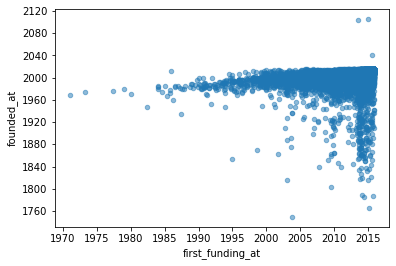

In [16]:
plt.scatter(companies['first_funding_at'], companies['founded_at'], s = 20, alpha = 0.5)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')

We Noticed that there are some outliers than can be removed from the dataset so we will create a temporary dataframe that will contain the outliers so we can drop them later on. The first outliers that we want to deduct are the ones at the left of the center.

In [17]:
from datetime import datetime
tempdf = companies.copy()
tempdf = tempdf[(tempdf.first_funding_at <= datetime.strptime("01/01/1983", "%d/%m/%Y"))& (tempdf.founded_at <= datetime.strptime("01/01/2000", "%d/%m/%Y"))]
dropseries = tempdf.copy()
dropseries

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_state_code,company_region,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
744,/organization/abo-data,ABO Data,http://PLATONE.IO,Enterprise Software,1000000,operating,USA,TX,TX - Other,Italy,1,1979-01-01,1979-01-01,1979-01-01,0 days
3728,/organization/apple,Apple,http://www.apple.com,Computers|Consumer Electronics|Electronics|Har...,250000,ipo,USA,CA,SF Bay Area,Cupertino,1,1976-04-01,1977-05-15,1977-05-15,409 days
8786,/organization/buena-park-locksmith,Buena Park Locksmith,http://www.BuenaParkLocksmithCA.com,Local Businesses,-,operating,USA,CA,Anaheim,Buena Park,1,1974-11-20,1973-04-15,1973-04-15,-584 days
26908,/organization/ikro,Ikro,http://www.ikro.com.br/,Automotive|Heavy Industry|Manufacturing,724000,closed,BRA,23,BRA - Other,Canoas,1,1947-01-01,1982-06-01,1982-06-01,12935 days
28378,/organization/intercomp,Intercomp,NaN,NaN,549000,closed,NaN,NaN,NaN,NaN,1,1968-01-01,1971-01-01,1971-01-01,1096 days
36251,/organization/mitrol-2,Mitrol,NaN,NaN,9000000,closed,NaN,NaN,NaN,NaN,1,1971-01-01,1980-01-01,1980-01-01,3287 days


Plotting the outliers on a separate graph:

Text(0, 0.5, 'founded_at')

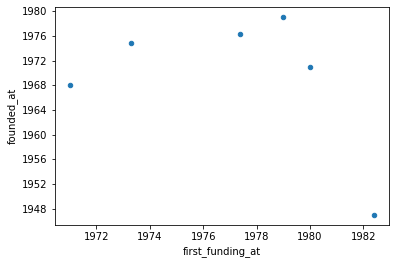

In [18]:
plt.scatter(tempdf['first_funding_at'], tempdf['founded_at'], s = 20)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')

Now we will determine the outliers that are the bottom of the center from the original graph.

In [19]:
tempdf = companies.copy()
tempdf = tempdf[(tempdf.first_funding_at < datetime.strptime("01/01/2005", "%d/%m/%Y"))& (tempdf.founded_at <= datetime.strptime("01/01/1900", "%d/%m/%Y"))]
tempdf

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_state_code,company_region,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
4563,/organization/asia-pacific-marine-container-lines,Asia Pacific Marine Container Lines,http://AsiaPacificMarine.com,Logistics Company|Shipping|Shipping Broker Ind...,-,closed,CAN,BC,Vancouver,Vancouver,1,1870-01-05,1998-09-01,1998-09-01,46990 days
4748,/organization/athenix,Athenix,http://www.athenixcorp.com,Biotechnology,43500000,acquired,USA,NC,Raleigh,Raleigh,4,1863-01-01,2001-09-10,2008-07-23,50656 days
8240,/organization/boylan-bottling,Boylan Bottling,https://www.boylanbottling.com/,NaN,-,closed,USA,NY,New York City,New York,1,1891-01-01,2003-09-10,2003-09-10,41159 days
12370,/organization/coleman-natural-foods,Coleman Natural Foods,http://www.colemannatural.com/,Hospitality,9000000,operating,USA,NC,Asheville,Mountain Home,1,1875-01-01,2003-08-20,2003-08-20,46982 days
13513,/organization/counterpane-internet-security-in...,Counterpane Internet Security,http://www.counterpane.com,Risk Management|Sales and Marketing|Security,20000000,acquired,USA,CA,SF Bay Area,Cupertino,1,1888-01-01,2003-01-14,2003-01-14,42016 days
20690,/organization/fkk-corporation,FKK Corporation,http://www.fkk-corporation.com,Hardware + Software,-,operating,JPN,22,Kyoto,Kyoto-shi,1,1854-02-01,1995-01-01,1995-01-01,51468 days
47744,/organization/remington-arms-company,Remington Arms Company,http://www.remington.com/,Manufacturing|Outdoors|Sporting Goods,30000000,operating,USA,NC,Greensboro,Madison,1,1816-01-01,2003-01-10,2003-01-10,68310 days
49957,/organization/scottish-newcastle-plc,Scottish & Newcastle PLC,NaN,Brewing,4200000,operating,GBR,U8,Edinburgh,Edinburgh,1,1749-01-01,2003-10-10,2003-10-10,93053 days


Plotting the outliers on a separate graph:

Text(0, 0.5, 'founded_at')

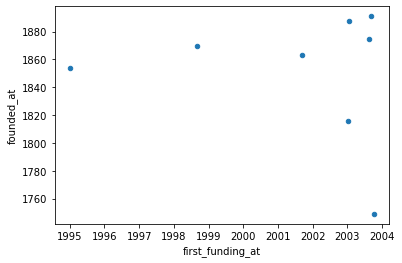

In [20]:
plt.scatter(tempdf['first_funding_at'], tempdf['founded_at'], s = 20)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')

Now we will concatenate the newly discovered outliers to the ones from before

In [21]:
dropseries = pd.concat([dropseries, tempdf])
dropseries

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_state_code,company_region,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
744,/organization/abo-data,ABO Data,http://PLATONE.IO,Enterprise Software,1000000,operating,USA,TX,TX - Other,Italy,1,1979-01-01,1979-01-01,1979-01-01,0 days
3728,/organization/apple,Apple,http://www.apple.com,Computers|Consumer Electronics|Electronics|Har...,250000,ipo,USA,CA,SF Bay Area,Cupertino,1,1976-04-01,1977-05-15,1977-05-15,409 days
8786,/organization/buena-park-locksmith,Buena Park Locksmith,http://www.BuenaParkLocksmithCA.com,Local Businesses,-,operating,USA,CA,Anaheim,Buena Park,1,1974-11-20,1973-04-15,1973-04-15,-584 days
26908,/organization/ikro,Ikro,http://www.ikro.com.br/,Automotive|Heavy Industry|Manufacturing,724000,closed,BRA,23,BRA - Other,Canoas,1,1947-01-01,1982-06-01,1982-06-01,12935 days
28378,/organization/intercomp,Intercomp,NaN,NaN,549000,closed,NaN,NaN,NaN,NaN,1,1968-01-01,1971-01-01,1971-01-01,1096 days
36251,/organization/mitrol-2,Mitrol,NaN,NaN,9000000,closed,NaN,NaN,NaN,NaN,1,1971-01-01,1980-01-01,1980-01-01,3287 days
4563,/organization/asia-pacific-marine-container-lines,Asia Pacific Marine Container Lines,http://AsiaPacificMarine.com,Logistics Company|Shipping|Shipping Broker Ind...,-,closed,CAN,BC,Vancouver,Vancouver,1,1870-01-05,1998-09-01,1998-09-01,46990 days
4748,/organization/athenix,Athenix,http://www.athenixcorp.com,Biotechnology,43500000,acquired,USA,NC,Raleigh,Raleigh,4,1863-01-01,2001-09-10,2008-07-23,50656 days
8240,/organization/boylan-bottling,Boylan Bottling,https://www.boylanbottling.com/,NaN,-,closed,USA,NY,New York City,New York,1,1891-01-01,2003-09-10,2003-09-10,41159 days
12370,/organization/coleman-natural-foods,Coleman Natural Foods,http://www.colemannatural.com/,Hospitality,9000000,operating,USA,NC,Asheville,Mountain Home,1,1875-01-01,2003-08-20,2003-08-20,46982 days


Finally, we will deduct the outliers that are the top right corner

In [22]:
tempdf = companies.copy()
tempdf = tempdf[(tempdf.first_funding_at > datetime.strptime("01/01/2010", "%d/%m/%Y"))& (tempdf.founded_at >= datetime.strptime("01/01/2030", "%d/%m/%Y"))]
tempdf

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_state_code,company_region,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
16681,/organization/dugoutfc-ltd,DugoutFC Ltd,http://www.dugoutfc.com,Fantasy Sports,100000,operating,NaN,NaN,NaN,NaN,1,2105-02-17,2015-01-01,2015-01-01,-32919 days
32736,/organization/livamp-2,LIVAMP,http://www.livamp.com,Entertainment|Music|Video,300000,closed,NaN,NaN,NaN,NaN,1,2041-09-21,2015-08-31,2015-08-31,-9518 days
53396,/organization/soply,Soply,https://soply.com/,Creative Industries|Digital Media|Marketplaces,150000,operating,GBR,H9,London,London,1,2104-01-01,2013-07-01,2013-07-01,-33055 days


Visualizing the outliers:

Text(0, 0.5, 'founded_at')

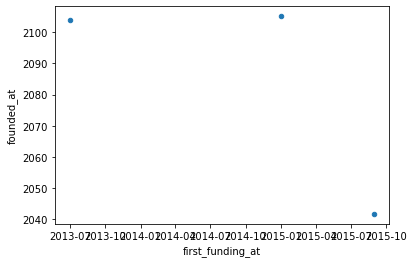

In [23]:
plt.scatter(tempdf['first_funding_at'], tempdf['founded_at'], s = 20)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')

Concatinating the outliers on the rest:

In [17]:
dropseries = pd.concat([dropseries, tempdf])
dropseries

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_state_code,company_region,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
744,/organization/abo-data,ABO Data,http://PLATONE.IO,Enterprise Software,1000000,operating,USA,TX,TX - Other,Italy,1,1979-01-01,1979-01-01,1979-01-01,0 days
3728,/organization/apple,Apple,http://www.apple.com,Computers|Consumer Electronics|Electronics|Har...,250000,ipo,USA,CA,SF Bay Area,Cupertino,1,1976-04-01,1977-05-15,1977-05-15,409 days
8786,/organization/buena-park-locksmith,Buena Park Locksmith,http://www.BuenaParkLocksmithCA.com,Local Businesses,-,operating,USA,CA,Anaheim,Buena Park,1,1974-11-20,1973-04-15,1973-04-15,-584 days
26908,/organization/ikro,Ikro,http://www.ikro.com.br/,Automotive|Heavy Industry|Manufacturing,724000,closed,BRA,23,BRA - Other,Canoas,1,1947-01-01,1982-06-01,1982-06-01,12935 days
28378,/organization/intercomp,Intercomp,NaN,NaN,549000,closed,NaN,NaN,NaN,NaN,1,1968-01-01,1971-01-01,1971-01-01,1096 days
36251,/organization/mitrol-2,Mitrol,NaN,NaN,9000000,closed,NaN,NaN,NaN,NaN,1,1971-01-01,1980-01-01,1980-01-01,3287 days
4563,/organization/asia-pacific-marine-container-lines,Asia Pacific Marine Container Lines,http://AsiaPacificMarine.com,Logistics Company|Shipping|Shipping Broker Ind...,-,closed,CAN,BC,Vancouver,Vancouver,1,1870-01-05,1998-09-01,1998-09-01,46990 days
4748,/organization/athenix,Athenix,http://www.athenixcorp.com,Biotechnology,43500000,acquired,USA,NC,Raleigh,Raleigh,4,1863-01-01,2001-09-10,2008-07-23,50656 days
8240,/organization/boylan-bottling,Boylan Bottling,https://www.boylanbottling.com/,NaN,-,closed,USA,NY,New York City,New York,1,1891-01-01,2003-09-10,2003-09-10,41159 days
12370,/organization/coleman-natural-foods,Coleman Natural Foods,http://www.colemannatural.com/,Hospitality,9000000,operating,USA,NC,Asheville,Mountain Home,1,1875-01-01,2003-08-20,2003-08-20,46982 days


Now, we can drop all of the outliers that have been detected.


In [18]:
list = dropseries.index
companies = companies.drop(list)
#companies['time_before_first_fund'].sort_values(ascending=False)

Plotting the graph once more after cleaning:

Text(0, 0.5, 'founded_at')

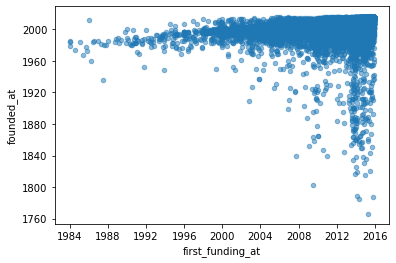

In [19]:
plt.scatter(companies['first_funding_at'], companies['founded_at'], s = 20, alpha=0.5)
plt.xlabel('first_funding_at')
plt.ylabel('founded_at')

Now, we can calculate the mean. Notice that there were not much of a difference but deducting the outliers helped keeping the data realistic because some dates were 2090, 2100, etc. which is unrealistic.

In [20]:
companies['time_before_first_fund'].mean()

Timedelta('1363 days 03:13:16.759422320')

Filling the missing values with the new mean:

In [21]:
companies['time_before_first_fund'].fillna(companies['time_before_first_fund'].mean(), inplace = True)
companies['time_before_first_fund']

0       1363 days 03:13:16.759422320
1                -187 days +00:00:00
2       1363 days 03:13:16.759422320
3                  443 days 00:00:00
4                 1665 days 00:00:00
                    ...             
66363   1363 days 03:13:16.759422320
66364            -194 days +00:00:00
66365             1308 days 00:00:00
66366              365 days 00:00:00
66367   1363 days 03:13:16.759422320
Name: time_before_first_fund, Length: 66326, dtype: timedelta64[ns]

After calculating the mean and filling the nulls with it, now we can impute the missing dates in the 'founded_at' column by subtracting the time before first funding from the first funding date.

In [22]:
companies['founded_at'].fillna(companies['first_funding_at'] - companies['time_before_first_fund'], inplace = True)
companies['founded_at']

0       2011-04-12 20:46:43.240577680
1       2014-09-04 00:00:00.000000000
2       2010-05-07 20:46:43.240577680
3       2007-01-01 00:00:00.000000000
4       2010-01-01 00:00:00.000000000
                     ...             
66363   2008-07-07 20:46:43.240577680
66364   2012-05-13 00:00:00.000000000
66365   2011-01-01 00:00:00.000000000
66366   2014-01-01 00:00:00.000000000
66367   2010-01-06 20:46:43.240577680
Name: founded_at, Length: 66326, dtype: datetime64[ns]

Converting 'aquired_at' of the acquisitons dataset from Object to date:

In [23]:
acquis['acquired_at'] =pd.to_datetime(acquis['acquired_at'], errors = 'coerce')
acquis.dtypes

company_permalink                 object
company_name                      object
company_category_list             object
company_country_code              object
company_state_code                object
company_region                    object
company_city                      object
acquirer_permalink                object
acquirer_name                     object
acquirer_category_list            object
acquirer_country_code             object
acquirer_state_code               object
acquirer_region                   object
acquirer_city                     object
acquired_at               datetime64[ns]
acquired_month                    object
price_amount                     float64
price_currency_code               object
dtype: object

Converting 'funded_at' of the investments dataset from Object to date:

In [24]:
invests['funded_at'] =pd.to_datetime(invests['funded_at'], errors = 'coerce')
invests.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
investor_permalink                 object
investor_name                      object
investor_country_code              object
investor_state_code                object
investor_region                    object
investor_city                      object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

Converting 'funded_at' of the rounds dataset from Object to date:

In [25]:
rounds['funded_at'] =pd.to_datetime(rounds['funded_at'], errors = 'coerce')
rounds.dtypes

company_permalink                  object
company_name                       object
company_category_list              object
company_country_code               object
company_state_code                 object
company_region                     object
company_city                       object
funding_round_permalink            object
funding_round_type                 object
funding_round_code                 object
funded_at                  datetime64[ns]
raised_amount_usd                 float64
dtype: object

## Imputing Categories

Regarding the category list in the five datasets, since we don't have any indicator on deducing the null values in this column, we will fill the nulls with "missing". With samples, it's provided that the same rows (companies) that their category is missing in one dataset, are the same rows in the others so even merging the datasets will not be helpful.


In [26]:
companies['company_category_list'].fillna('missing', inplace=True)
acquis['company_category_list'].fillna('missing', inplace=True)
acquis['acquirer_category_list'].fillna('missing', inplace=True)
invests['company_category_list'].fillna('missing', inplace=True)
rounds['company_category_list'].fillna('missing', inplace=True)

## Imputing Raised Amount

There are alot of missing data in the raised amount column in the data set. One strategy that could be taken is calculating the mean of all of the funds of this certain company and impute its nulls with the average of total fund it has recieved before. First we calculate the mean of of the total funding of each company then add it in a new row, then compare each row if the raised amount column is null, then fill it with the average of the company otherwise leave it as it is.

In [27]:
total = invests.groupby(['company_name'])['raised_amount_usd'].transform(np.mean)
total = pd.DataFrame(total)
invests['total_raised'] = total
invests['raised_amount_usd'] = np.where((invests['raised_amount_usd'].isnull()), invests['total_raised'], invests['raised_amount_usd'])
invests['raised_amount_usd'].fillna(invests['raised_amount_usd'].mean(), inplace = True)
invests

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,total_raised
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2.000000e+06,2.000000e+06
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,1.493930e+07,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,4.125000e+04,4.125000e+04
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2.000000e+07,1.010714e+07
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3.000000e+06,1.010714e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168642,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,HRV,15,Split,Split,/organization/eleven,Eleven,BGR,42,Sofia,Sofia,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,2013-05-01,3.284200e+04,3.576800e+04
168643,/organization/Áeron,ÁERON,missing,NaN,NaN,NaN,NaN,/organization/day-one-capital,Day One Capital Fund Management,HUN,5,Budapest,Budapest,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,1.493930e+07,NaN
168644,/organization/Áeron,ÁERON,missing,NaN,NaN,NaN,NaN,/organization/sz-chenyi-capital-fund-management,Széchenyi Capital Fund Management,NaN,NaN,NaN,NaN,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,1.493930e+07,NaN
168645,/organization/Ôasys-2,Ôasys,Consumer Electronics|Internet of Things|Teleco...,USA,CA,SF Bay Area,San Francisco,/organization/startupbootcamp,Startupbootcamp,GBR,H9,London,London,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,2015-01-01,1.819200e+04,1.819200e+04


In [55]:
#farah stop point here

## Cleaning & Imputing Geographical Locations

### Removing `company_state_code` and `company_region`

We don't need `company_state_code` in our analysis, <br>
As country code and city are sufficient to know <br>
an approximation of the geographical location of the company. <br>
Therefore, let's remove it:

In [56]:
companies[['company_country_code', 'company_state_code', 'company_city']].head(10)

,company_country_code,company_state_code,company_city
0,IND,16,Mumbai
1,USA,DE,Delaware City
2,NaN,NaN,NaN
3,CHN,22,Beijing
4,USA,IL,Champaign
5,HKG,NaN,Hong Kong
6,CAN,BC,Vancouver
7,USA,CA,Mountain View
8,USA,CA,San Francisco
9,CHL,12,Las Condes


In [28]:
companies.drop('company_state_code', axis=1, inplace=True)

`company_region` is also redundent, as it is usually the same as `company_city`.<br>
Let's validate this:

In [29]:
# Note: same logic applies for the permalinks
acquis.dropna(subset=['acquirer_permalink', 'acquirer_name'], inplace=True)
invests.dropna(subset=['investor_permalink', 'investor_name'], inplace=True)

Also, we'll remove the missing values for columns that have less than 100 `NaN`, <br>
as they're small in comparison to their respective datasets:

In [59]:
companies[companies.company_region == companies.company_city][['company_region', 'company_city']]

,company_region,company_city
0,Mumbai,Mumbai
3,Beijing,Beijing
5,Hong Kong,Hong Kong
6,Vancouver,Vancouver
11,Orlando,Orlando
...,...,...
66354,Bath,Bath
66360,Milwaukee,Milwaukee
66362,London,London
66363,Beijing,Beijing


Let's see the mean of similarity between the strings using builtin library `difflib.SequenceMatcher`:

In [30]:
from difflib import SequenceMatcher
similarities = []
rgs = companies.company_region.values.tolist()
cts = companies.company_city.values.tolist()
for i in range(min(len(rgs), len(cts))):
    if not (rgs[i] != rgs[i] or cts[i] != cts[i]): # If either of the elements is NaN, then don't find the similarity
        similarities.append(SequenceMatcher(None, rgs[i], cts[i]).ratio()) # Gets the similarity between each two strings
avgSim = sum(similarities) / len(similarities)
avgSim

0.6175397944380312

However, `SequenceMatcher` only finds the longest contiguous matching subsequence, <br>
and all other characters will drastically decrease the similarity, which isn't very accurate, <br>
Therefore, let's try to see how many times a string is a substring of another:

In [31]:
subsCount = 0
for i in range(min(len(rgs), len(cts))):
    if not (rgs[i] != rgs[i] or cts[i] != cts[i]):
        subsCount += (rgs[i] in cts[i] or cts[i] in rgs[i])
subsCount

29878

So to summarize: almost half of the companies have the same data for `region` and `city` (25360) <br>
There are around 5000 companies that have the same semantic meaning between the data <br>
(e.g: 'New York City' is the same as 'NYC, New York City') <br>
Therefore, `company_region` can be removed without losing any possible future insights:

In [32]:
companies.drop('company_region', axis=1, inplace=True)

acquis.drop('company_region', axis=1, inplace=True)
acquis.drop('acquirer_region', axis=1, inplace=True)

invests.drop('company_region', axis=1, inplace=True)
invests.drop('investor_region', axis=1, inplace=True)

rounds.drop('company_region', axis=1, inplace=True)

### Imputing `company_country_code` and `company_city`

#### Failed attempt using `company_permalink`:
1. check the company's permalink
2. find HTML that contains the headquarters location (country and city)
3. scrape country and convert it to country code using `pycountry.countries`
4. scrape city and impute it in `company_city`

Step 1: appending "https://www.crunchbase.com" to each permalink <br>
to be able to access the company's webpage on crunchbase. <br>
However, since the new permalink will be much longer (thus slower for accessing as a dataset's primary index) <br>
we'll create a function that appends the string as a prefix and that will be accessed throughout the notebook

Step 2: Finding location of country and city on the webpage:
let's check company [004](https://www.crunchbase.com/organization/004)'s webpage for example: <Br>
<img src="Phase 1/countryAndCityInCrunchbase.png" width=400 height=300 />

By inspecting the HTML, we notice 4 instances of the class <br>
`component--field-formatter field-type-identifier-multi` (in a `span` element),<br>and the data that we want
is always the first instance: <br>
<img src="Phase 1/countryAndCityLocationInHTML.png" width=700 height=500 />

Step 3: scrape that info using `requests` and `bs4` libraries: <br>
(Note, we're using `threading.Thread` here to increase performance by scraping in multithreads)

However, this is a deadend, as crunchbase is powered by [distill network](https://www.google.com/search?q=distil+network&sxsrf=APq-WBt2mubTHz1xGfmKgpzlWtHah5qAaA%3A1648578960023&ei=kFFDYsx646qVB_nKh7gK&ved=0ahUKEwjMgq-a--v2AhVjVeUKHXnlAacQ4dUDCA4&uact=5&oq=distil+network&gs_lcp=Cgdnd3Mtd2l6EAMyBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjIGCAAQBxAeMgYIABAHEB4yBggAEAcQHjoHCCMQsAMQJzoHCAAQRxCwA0oECEEYAEoECEYYAFCyCliyCmCLD2gBcAF4AIABowGIAaMBkgEDMC4xmAEAoAEByAEKwAEB&sclient=gws-wiz#:~:text=distil%20networks%20uses%20machine%20learning%20to%20identify%20and%20mitigate%20potential%20bad%20bots%2C%20fingerprinting%20them%20so%20that%20they%20can%20still%20be%20tracked%20if%20they%20reconnect%20from%20a%20different%20ip%20address) <br>
So when we tried to scrap from it, the following html was always displayed: <br><br>
<img src="Phase 1/crunchbaseAccessDenied.png">

#### Failed attempt using [linkedin](https://www.linkedin.com/in/ashrafharess/)

It failed because after a while, linkedin detects that you are a bot: <br><br>
<img src='Phase 1/linkedinSecurityCheck.png' width=500 height=300>

However, the steps are displayed below to show how this was initially done using multithreads:

Step 1: Login into linkedin using `selenium.webdriver`:

In [63]:
from selenium import webdriver
import time
import warnings
warnings.filterwarnings('ignore') # to suppress warnings about internal code deprecations
options=webdriver.ChromeOptions()
options.add_argument('--incognito')
options.add_argument('--headless')
driver=webdriver.Chrome(options=options)
driver.get('https://www.linkedin.com/uas/login')

username = driver.find_element_by_id('username')
username.send_keys('xxfarah600xx@gmail.com')
password = driver.find_element_by_id('password')
password.send_keys('#0LinkedIn0#')
log_in_button = driver.find_element_by_class_name('from__button--floating')
log_in_button.click()

Step 2: Visualize the html of the data you need to scrape: <br><br>
<img src='Phase 1/linkedinAboutLocations.png' width=800 height=500>

In [64]:
driver.get('https://www.linkedin.com/company/absolvent/about/')
time.sleep(3) # sleeping to render javascript code before parsing to BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [65]:
locCard = soup.find('div', 'org-location-card pv2')
locCard.text

'\n\n      Primary\n    \n \n     Warsaw,   PL\n  \n\n\n        Get directions\n      \n\n        Get directions to  Warsaw,   PL\n      \n\n\n\n\n'

In [66]:
import re
re.findall(r'Primary[\n\s]+(\w+)', locCard.text)

['Warsaw']

Step 3: Visualize another part of the html in case step 3 doesn't work: <br><br>
<img src='Phase 1/linkedinAboutHeadquarters.png' width=700 height=500>

In [67]:
driver.get('https://www.linkedin.com/company/association-for-computing-machinery/about/')
time.sleep(3) # sleeping to render javascript code before parsing to BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [68]:
dl = soup.find('div', 'mb6').find('dl')
dl

<dl class="overflow-hidden">
<dt class="mb1 text-heading-small">
          Website
        </dt>
<dd class="mb4 text-body-small t-black--light">
<a class="link-without-visited-state ember-view" href="https://www.acm.org/" id="ember61" rel="noopener noreferrer" tabindex="0" target="_blank">
<span class="link-without-visited-state" dir="ltr">
              https://www.acm.org/
            </span>
</a>
</dd>
<dt class="mb1 text-heading-small">
          Phone
        </dt>
<dd class="mb4 text-body-small t-black--light">
<a class="link-without-visited-state ember-view" href="tel:+1 (212) 626-0500" id="ember62" rel="noopener noreferrer" tabindex="0" target="_blank">
<span aria-hidden="true" class="link-without-visited-state" dir="ltr">
              +1 (212) 626-0500
            </span>
<span class="visually-hidden">
              Phone number is +1 (212) 626-0500
            </span>
</a>
</dd>
<dt class="mb1 text-heading-small">
            Industry
          </dt>
<dd class="mb4 text-body

In [69]:
dl = soup.find('div', 'mb6').find('dl')
nms = []
for tag in dl:
    txt = tag.text
    nms.append(txt)
nms

['\n',
 '\n          Website\n        ',
 '\n',
 '\n\n\n              https://www.acm.org/\n            \n\n',
 '\n',
 '\n          Phone\n        ',
 '\n',
 '\n\n\n              +1 (212) 626-0500\n            \n\n              Phone number is +1 (212) 626-0500\n            \n\n',
 '\n',
 '\n            Industry\n          ',
 '\n',
 '\n            Book and Periodical Publishing\n          ',
 '\n',
 '\n          Company size\n        ',
 '\n',
 '\n            51-200 employees\n        ',
 '\n',
 '\n            1,184 on LinkedIn\n            \n \n\n\n\n    Includes members with current employer listed as ACM, Association for Computing Machinery, including part-time roles.\n\n\n\n',
 '\n',
 '\n            Headquarters\n          ',
 '\n',
 '\n            New York, NY\n          ',
 '\n',
 '',
 '\n',
 '\n          Founded\n        ',
 '\n',
 '\n          1947\n        ',
 '\n',
 '\n          Specialties\n        ',
 '\n',
 '\n          Computing\n        ',
 '\n']

In [70]:
# getting the values in key-value pairs, then we will extract the country from key "Headquarters"
dl = soup.find('div', 'mb6').find('dl')
keys = []
values = []
for tag in dl.find_all('dt'):
    txt = tag.text.strip()
    if (txt != ''):
        keys.append(txt)
for tag in dl.find_all('dd'):
    txt = tag.text.strip()
    if (txt != ''):
        values.append(txt)


In [71]:
keys, values

(['Website',
  'Phone',
  'Industry',
  'Company size',
  'Headquarters',
  'Founded',
  'Specialties'],
 ['https://www.acm.org/',
  '+1 (212) 626-0500\n            \n\n              Phone number is +1 (212) 626-0500',
  'Book and Periodical Publishing',
  '51-200 employees',
  '1,184 on LinkedIn\n            \n \n\n\n\n    Includes members with current employer listed as ACM, Association for Computing Machinery, including part-time roles.',
  'New York, NY',
  '1947',
  'Computing'])

In [72]:
values = [txt for txt in values if "Includes" not in txt] # a message which contains the word "Includes" sometime appears and is not needed, thus we don't include it
values

['https://www.acm.org/',
 '+1 (212) 626-0500\n            \n\n              Phone number is +1 (212) 626-0500',
 'Book and Periodical Publishing',
 '51-200 employees',
 'New York, NY',
 '1947',
 'Computing']

In [73]:
# putting the key-value pairs in a dictionary
linkedinDict = dict(zip(keys, values))
linkedinDict

{'Website': 'https://www.acm.org/',
 'Phone': '+1 (212) 626-0500\n            \n\n              Phone number is +1 (212) 626-0500',
 'Industry': 'Book and Periodical Publishing',
 'Company size': '51-200 employees',
 'Headquarters': 'New York, NY',
 'Founded': '1947',
 'Specialties': 'Computing'}

In [74]:
linkedinDict["Headquarters"]

'New York, NY'

Step 4: getting the country code of the companies and their corresponding indices and putting them in a list of tuples:

In [75]:
import threading # using multithreads to speed things up a little
lock = threading.Lock()
import pycountry
from geopy.geocoders import Nominatim # using this library to convert cities to countries
import time
import re

geolocator = Nominatim(user_agent="ashraf196280@bue.edu.eg")

idxToNan = []
def fetchCountry(idx, link):
    try:
        lock.acquire()
        driver.get(link) # same driver used from step 1
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, "html.parser")
        lock.release()
        dl = soup.find('div', 'mb6').find('dl')
        keys = []
        values = []
        for tag in dl.find_all('dt'):
            txt = tag.text.strip()
            if (txt != ''):
                keys.append(txt)
        for tag in dl.find_all('dd'):
            txt = tag.text.strip()
            if (txt != ''):
                values.append(txt)
        values = [txt for txt in values if "Includes" not in txt]
        linkedinDict = dict(zip(keys, values))
        if ('Headquarters' in linkedinDict):
            city = linkedinDict["Headquarters"]
            city = city.split(',')[0] # eg: "Cupertino, California" will be ["Cupertino", "California"], so "Cupertino" will be returned
        else:
            locCard = soup.find('div', 'org-location-card pv2')
            city = re.findall(r'Primary[\n\s]+(\w+)', locCard.text)[0]
        lock.acquire()
        location = geolocator.geocode(city, language="en")
        lock.release()
        if location is None:
            raise
    except:
        lock.acquire()
        idxToNan.append((idx, "missing")) # means that this website is not found on linkedin, so declare it as missing
        lock.release()
        return
    
    country = location.address.split(', ')[-1]
    try:
        alpha3Code = pycountry.countries.get(name=country).alpha_3
    except:
        alpha3Code = country[0:3].upper() #if not found in pycountry, assume that it is the first 3 letters of the country name
    lock.acquire()
    idxToNan.append((idx, alpha3Code))
    lock.release()


In [76]:
from threading import Thread
def imputeFromLinks(df, colToSuffixIntoURL, colToImpute, start, end, linkPrefix = ""):
    links = df[df[colToImpute].isnull()][[colToSuffixIntoURL]].squeeze()[start:end] # "squeeze()" converts df to series
    threads = []
    for tup in links.iteritems(): # tup[0] --> index, tup[1] --> url (i.e. link)
        th = Thread(target=fetchCountry, args=(tup[0], linkPrefix + tup[1].replace(" ", "") + '/about')) #making sure company name doesn't have spaces when suffixed into the url
        threads.append(th)
        th.start()
    for th in threads:
        th.join() # to wait until all multithreads finish to properly display the dataframe

In [77]:
# single threaded version (just in case multithreads gets blocked by linkedin)
from threading import Thread
def imputeFromLinksSingleThreads(df, colToSuffixIntoURL, colToImpute, linkPrefix = ""):
    links = df[df[colToImpute].isnull()][[colToSuffixIntoURL]].squeeze() # "squeeze()" converts df to series
    for tup in links.iteritems(): # tup[0] --> index, tup[1] --> url (i.e. link)
        fetchCountry(tup[0], linkPrefix + tup[1].replace(" ", "") + '/about') #making sure company name doesn't have spaces when suffixed into the url
        

In [78]:
links = companies[companies['company_country_code'].isnull()][['company_name']].squeeze()
len(links)

6952

In [79]:
#imputeFromLinks(companies, "company_name", "company_country_code", "https://www.linkedin.com/company/", 0, 10)

In [80]:
#idxToNan

In [81]:
# this was to save the output to a csv file in case the pc shut off after the above cell executed
#dfLinkedin = pd.DataFrame(idxToNan, columns=['index', 'company_country_code'])
#dfLinkedin.set_index('index')
#dfLinkedin.to_csv('Phase 1/countryCodesLinkedIn.csv', index=False)

#### Successful attempt using TLDs of `homepage_url`

Let's check the top level domain (TLD) of each link using regex and see if we can use that <br>
to impute the country code:

In [82]:
# As you can see, there are only approximately 1500 rows that don't contain neither country_code nor homepage_url
hUrls = companies[companies['company_country_code'].isnull()][['homepage_url']].squeeze()
hUrls.dropna(inplace=True)
len(hUrls), len(companies[companies['company_country_code'].isnull()])

(5548, 6952)

In [83]:
hUrls.head(3)

2         http://oneofthem.jp
21    http://www.1000chi.com/
35    http://beansaround.com/
Name: homepage_url, dtype: object

In [84]:
hUrls.str.findall(r'(\.[^.]*)$').head(3) # use '\.([^.]*)$' if you don't want the '.', but we do, so leave it

2       [.jp]
21    [.com/]
35    [.com/]
Name: homepage_url, dtype: object

In [85]:
hUrls = hUrls.str.findall(r'(\.[^.]*)$').apply(lambda x : ''.join(x).split('/')[0]) # apply() will convert the list of strings to a string and remove '/' at the end of the string
hUrls

2         .jp
21       .com
35       .com
39       .com
45       .com
         ... 
66317    .com
66325     .co
66333    .com
66365     .hu
66367    .com
Name: homepage_url, Length: 5548, dtype: object

In [86]:

unwantedVals = hUrls.str.contains(pat='^$|com') # "^$" means empty string, "|" means "or"
hUrls = hUrls[~unwantedVals] # "~" is equivalent to "unwantedVals == False"
hUrls

2           .jp
54          .br
79       .media
126         .hk
159         .me
          ...  
66220       .cz
66230       .my
66270      .php
66325       .co
66365       .hu
Name: homepage_url, Length: 1541, dtype: object

Create a dictionary where key = TLD, value = country <br>
e.g --> '.jp' : 'Japan'

In [87]:
#csv obtained from https://gist.github.com/derlin/421d2bb55018a1538271227ff6b1299d#file-country-codes-tlds-csv
tldsToCountries = pd.read_csv('Phase 1/country-codes-tlds.csv')
tldsToCountries.drop_duplicates(subset='tld', keep='first', inplace=True)
tldsToCountries['tld'] = tldsToCountries['tld'].apply(lambda x: x.replace(' ', ''))
tldsToCountries.to_csv(r'Phase 1/newCountryCodesTlds.csv', index = None, header=True)
tldsToCountries = tldsToCountries.set_index('tld').squeeze()
tldsToCountries = tldsToCountries.to_dict()
tldsToCountries['.jp']

'Japan'

Use that dictionary to convert TLDs to their respective countries:

In [88]:
hCompanyLocs = hUrls.copy()
hCompanyLocs = hCompanyLocs.apply(lambda x : tldsToCountries[x] if (x in tldsToCountries) else 'none')
hCompanyLocs = hCompanyLocs[hCompanyLocs != 'none']
hCompanyLocs

2                           Japan
54                         Brazil
126                     Hong Kong
159                    Montenegro
281                   Switzerland
                   ...           
66184              Réunion Island
66220    Czechia (Czech Republic)
66230                    Malaysia
66325                    Colombia
66365                     Hungary
Name: homepage_url, Length: 1213, dtype: object

In [89]:
# 1213 countries could be imputed
len(hCompanyLocs)

1213

Convert those countries to country codes:

In [90]:
import pycountry
def toAlphaCode3(country):
    countryInfo = pycountry.countries.get(name=country)
    if (countryInfo is None):
        return "none"
    return countryInfo.alpha_3

hCompanyLocs = hCompanyLocs.apply(lambda x : toAlphaCode3(x))
hCompanyLocs = hCompanyLocs[hCompanyLocs != 'none']
hCompanyLocs

2        JPN
54       BRA
126      HKG
159      MNE
281      CHE
        ... 
65745    SVK
66120    POL
66230    MYS
66325    COL
66365    HUN
Name: homepage_url, Length: 900, dtype: object

In [91]:
# only 900 countries have country codes present, so impute those only
# the following is just to illustrate the for loop in the next cell:
hCompanyLocs.index[0], hCompanyLocs.iloc[0]

(2, 'JPN')

impute into `country_codes` of `companies` dataset

In [92]:
for i in range(len(hCompanyLocs)):
    idx = hCompanyLocs.index[i]
    code = hCompanyLocs.iloc[i]
    companies.at[idx, 'company_country_code'] = code

#### Imputing rest of cities and country codes

After the failed attempt to scrape the country and then get the country code of each company we will impute the values with "missing" for now.

In [33]:
companies['company_country_code'].fillna("missing", inplace=True)
companies['company_city'].fillna("missing", inplace=True)

acquis['company_country_code'].fillna("missing", inplace=True)
acquis['company_state_code'].fillna("missing", inplace=True)
acquis['company_city'].fillna("missing")
acquis['acquirer_country_code'].fillna("missing", inplace=True)
acquis['acquirer_state_code'].fillna("missing", inplace=True)
acquis['acquirer_city'].fillna("missing", inplace=True)

invests['company_country_code'].fillna("missing", inplace=True)
invests['company_state_code'].fillna("missing", inplace=True)
invests['company_city'].fillna("missing", inplace=True)
invests['investor_city'].fillna("missing", inplace=True)
invests['investor_country_code'].fillna("missing", inplace=True)
invests['investor_state_code'].fillna("missing", inplace=True)


rounds['company_country_code'].fillna("missing", inplace=True)


## Removing duplicates in `acquistions` dataset

In [34]:
# To show that there really are duplicates in acquisitions dataset
acquis[acquis.duplicated(keep = False) == True]

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
1856,/organization/backcountry-com,Backcountry.com,E-Commerce,USA,UT,Park City,/organization/tsg-consumer-partners,TSG Consumer Partners,missing,USA,CA,San Francisco,2015-07-01,2015-07,NaN,USD
1857,/organization/backcountry-com,Backcountry.com,E-Commerce,USA,UT,Park City,/organization/tsg-consumer-partners,TSG Consumer Partners,missing,USA,CA,San Francisco,2015-07-01,2015-07,NaN,USD
1932,/organization/bartlett-holdings,Bartlett Holdings,missing,USA,MA,Plymouth Meeting,/organization/harvest-partners,Harvest Partners,missing,USA,NY,New York,2010-12-01,2010-12,NaN,USD
1933,/organization/bartlett-holdings,Bartlett Holdings,missing,USA,MA,Plymouth Meeting,/organization/harvest-partners,Harvest Partners,missing,USA,NY,New York,2010-12-01,2010-12,NaN,USD
1934,/organization/bartlett-holdings,Bartlett Holdings,missing,USA,MA,Plymouth Meeting,/organization/harvest-partners,Harvest Partners,missing,USA,NY,New York,2010-12-01,2010-12,NaN,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17643,/organization/unveillance,Unveillance,Technology,USA,DE,Wilmington,/organization/mandiant,Mandiant,Security,USA,VA,Alexandria,2012-09-10,2012-09,NaN,USD
17644,/organization/unveillance,Unveillance,Technology,USA,DE,Wilmington,/organization/mandiant,Mandiant,Security,USA,VA,Alexandria,2012-09-10,2012-09,NaN,USD
17645,/organization/unveillance,Unveillance,Technology,USA,DE,Wilmington,/organization/mandiant,Mandiant,Security,USA,VA,Alexandria,2012-09-10,2012-09,NaN,USD
18387,/organization/webmethods,webMethods,B2B|Enterprise Software|Web Development,missing,missing,NaN,/organization/software-ag,Software AG,Big Data|Enterprises|Enterprise Software|Software,DEU,5,Darmstadt,2007-04-01,2007-04,500000000.0,USD


In [35]:
acquis.drop_duplicates()
acquis

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,missing,missing,missing,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,missing,USA,NY,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,missing,missing,missing,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,missing,USA,NY,Mamaroneck,2001-02-02,2001-02,NaN,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18963,/organization/zynk-mobile,Zynk Mobile,missing,missing,missing,NaN,/organization/zenvia,Zenvia,Mobile,BRA,23,Porto Alegre,2013-03-01,2013-03,NaN,USD
18964,/organization/zyrion,Zyrion Inc,Networking|Software,USA,CA,Sunnyvale,/organization/kaseya,Kaseya,Data Centers|Data Security|Flash Storage|Homel...,missing,missing,missing,2013-06-25,2013-06,NaN,USD
18965,/organization/zystor,Zystor,Biotechnology,USA,WI,Milwaukee,/organization/biomarin-pharmaceutical,BioMarin Pharmaceutical,Pharmaceuticals,USA,CA,San Rafael,2010-08-18,2010-08,115000000.0,USD
18966,/organization/zytex-group,Zytex group,Manufacturing,IND,16,Mumbai,/organization/brenntag-ag,Brenntag AG,Chemicals|Manufacturing|Services,DEU,7,Mülheim An Der Ruhr,2013-09-25,2013-09,14000000.0,USD


## Checking and Converting `dtypes`

In [36]:
def datasetsDtypes(dfList, datasetNames, dtypesCol="dtypes_", pad=""):
    cols = []
    nulls = []
    maxArrayLen = 0
    for i, df in enumerate(dfList):
        cols.append(df.columns.tolist())
        nulls.append(df.dtypes.tolist())
        maxArrayLen = max(maxArrayLen, len(cols[i]))
    
    dictCsvs = {}
    for i, df in enumerate(dfList):
        cols[i] += [pad] * (maxArrayLen - len(cols[i])) #padding the lists to make them have equal lengths 
        nulls[i] += [None] *  (maxArrayLen - len(nulls[i]))
        dictCsvs[datasetNames[i]] = cols[i]
        dictCsvs[dtypesCol + str(i+1)] = nulls[i]
    
    return pd.DataFrame(dictCsvs)

In [45]:
datasetsDtypes(dfAll, lstCsvNames)

,acquisitions,dtypes_1,additions,dtypes_2,companies,dtypes_3,investments,dtypes_4,rounds,dtypes_5
0,company_permalink,object,content,object,company_permalink,object,company_permalink,object,company_permalink,object
1,company_name,object,month_str,object,company_name,object,company_name,object,company_name,object
2,company_category_list,object,year_str,int64,homepage_url,object,company_category_list,object,company_category_list,object
3,company_country_code,object,value,int64,company_category_list,object,company_country_code,object,company_country_code,object
4,company_state_code,object,,None,funding_total_usd,object,company_state_code,object,company_state_code,object
5,company_city,object,,None,status,object,company_city,object,company_city,object
6,acquirer_permalink,object,,None,company_country_code,object,investor_permalink,object,funding_round_permalink,object
7,acquirer_name,object,,None,company_city,object,investor_name,object,funding_round_type,object
8,acquirer_category_list,object,,None,funding_rounds,int64,investor_country_code,object,funding_round_code,object
9,acquirer_country_code,object,,None,founded_at,datetime64[ns],investor_state_code,object,funded_at,datetime64[ns]


From the above dataframe, convert `funding_total_usd` <br>
in `companies` datset into float and then fill it and <br>
`raised_amount_usd` in `rounds` dataset to  nulls with zeros

In [46]:
companies['funding_total_usd'] = pd.to_numeric(companies['funding_total_usd'],errors = 'coerce')
companies['funding_total_usd'].fillna(0, inplace = True)
companies['funding_total_usd'] = companies['funding_total_usd'].astype(float, errors = 'raise')

In [47]:
rounds['raised_amount_usd'].fillna(0, inplace = True)

In [48]:
dfAll = [acquis, companies, invests, rounds] # Reassigning dfAll as sometimes the updates done in a dataframe don't reflect in the list
lstCsvNames = ["acquisitions", "companies", "investments", "rounds"]
datasetsDtypes(dfAll, lstCsvNames)

,acquisitions,dtypes_1,companies,dtypes_2,investments,dtypes_3,rounds,dtypes_4
0,company_permalink,object,company_permalink,object,company_permalink,object,company_permalink,object
1,company_name,object,company_name,object,company_name,object,company_name,object
2,company_category_list,object,homepage_url,object,company_category_list,object,company_category_list,object
3,company_country_code,object,company_category_list,object,company_country_code,object,company_country_code,object
4,company_state_code,object,funding_total_usd,float64,company_state_code,object,company_state_code,object
5,company_city,object,status,object,company_city,object,company_city,object
6,acquirer_permalink,object,company_country_code,object,investor_permalink,object,funding_round_permalink,object
7,acquirer_name,object,company_city,object,investor_name,object,funding_round_type,object
8,acquirer_category_list,object,funding_rounds,int64,investor_country_code,object,funding_round_code,object
9,acquirer_country_code,object,founded_at,datetime64[ns],investor_state_code,object,funded_at,datetime64[ns]


## Checking Nulls

Now that we imputed all missing data, we will check and see that there are no more null values in any data set. Notice that the other nulls are in columns that are dropped already in the dataframes.

In [51]:
dfAll = [acquis, companies, invests, rounds] # Reassigning dfAll as sometimes the updates done in a dataframe don't reflect in the list
lstCsvNames = ["acquisitions", "companies", "investments", "rounds"]
dfAllNulls = datasetsNulls(dfAll, lstCsvNames)
dfAllNulls

,acquisitions,nulls_1,companies,nulls_2,investments,nulls_3,rounds,nulls_4
0,company_permalink,0.0,company_permalink,0.0,company_permalink,0,company_permalink,0.0
1,company_name,0.0,company_name,0.0,company_name,0,company_name,0.0
2,company_category_list,0.0,homepage_url,5055.0,company_category_list,0,company_category_list,0.0
3,company_country_code,0.0,company_category_list,0.0,company_country_code,0,company_country_code,0.0
4,company_state_code,0.0,funding_total_usd,0.0,company_state_code,0,company_state_code,10946.0
5,company_city,4902.0,status,0.0,company_city,0,company_city,10164.0
6,acquirer_permalink,0.0,company_country_code,0.0,investor_permalink,0,funding_round_permalink,0.0
7,acquirer_name,0.0,company_city,0.0,investor_name,0,funding_round_type,0.0
8,acquirer_category_list,0.0,funding_rounds,0.0,investor_country_code,0,funding_round_code,83808.0
9,acquirer_country_code,0.0,founded_at,1.0,investor_state_code,0,funded_at,0.0


In [52]:
# Note that "founded_at" and "first_funding_at" has new NaNs, as the conversion to datetime wasn't successful in 3 rows
# so let's remove them
companies['founded_at'].dropna(inplace=True)
companies['first_funding_at'].dropna(inplace=True)

# Saving Cleaned Datasets

In [104]:
#prefix = 'datasets/startupsCleaned/'
#suffix = 'Cleaned.csv'
#acquis.to_csv(prefix+'acquisitions'+suffix, index=False)
#companies.to_csv(prefix+'companies'+suffix, index=False)
#invests.to_csv(prefix+'investments'+suffix, index=False)
#rounds.to_csv(prefix+'rounds'+suffix, index=False)

# Answering Questions From The Given Datasets

## Question 1 (Ashraf & Farah)

-	Can the factors that affect a start-up’s growth be determined?
    -	For this: We are initially interested in <br> `funding_total_usd`, `status`, and `funding_rounds`


This question can be measured with two approches:
- Divide the companies into categories based on their status (either closed, operating or acquired) then look at the average of funding each category receives, then determine the correlation between the closed companies and their failure due to the low funds.
- the second approch is finding how frequent a company receives funding regardless of how big or small this funding is. Funding frequency is important to consistently pump money into the company so it is a good indicator.

First, we will join the two datasets to answer our question which are companies and rounds


In [234]:
companies.sort_values(by=['company_name'], inplace=True)
rounds.sort_values(by=['company_name'],inplace=True)
comp_rounds = companies.join(rounds.set_index('company_name'), on='company_name', lsuffix='_left', rsuffix='_right')
comp_rounds.columns

Index(['company_permalink_left', 'company_name', 'homepage_url',
       'company_category_list_left', 'funding_total_usd', 'status',
       'company_country_code_left', 'company_city_left', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at',
       'time_before_first_fund', 'company_permalink_right',
       'company_category_list_right', 'company_country_code_right',
       'company_state_code', 'company_city_right', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

We will slice our new joined dataset into three categories based on the company's status:

In [235]:
operatingcomp_rounds = comp_rounds[comp_rounds['status'] == 'operating']
operatingcomp_rounds = operatingcomp_rounds[['company_name', 'funding_rounds', 'raised_amount_usd', 'funded_at']]
operatingcomp_rounds

,company_name,funding_rounds,raised_amount_usd,funded_at
24857,#HASHOFF,2,455000.0,2014-12-08
24857,#HASHOFF,2,500000.0,2015-08-11
0,#fame,1,10000000.0,2015-01-05
59910,&TV Communications,2,1000000.0,2010-06-04
59910,&TV Communications,2,3000000.0,2010-09-23
...,...,...,...,...
31300,İş kutusu video ajansı,1,100000.0,2014-03-13
18356,Еnso.fm,1,27838.0,2015-07-01
51461,​Shwrüm,1,50000.0,2013-01-01
63626,​WestEd,1,3000000.0,2014-07-22


In [236]:
acquiredcomp_rounds = comp_rounds[comp_rounds['status'] == 'acquired']
acquiredcomp_rounds = acquiredcomp_rounds[['company_name', 'funding_rounds', 'raised_amount_usd', 'funded_at']]
acquiredcomp_rounds

,company_name,funding_rounds,raised_amount_usd,funded_at
63213,#waywire,1,1750000.0,2012-06-30
47335,(RED),1,2323.0,2000-03-05
54453,//Staq.io,1,0.0,2012-10-01
15,1 Mainstream,1,5000000.0,2015-03-17
20,1000 Markets,1,500000.0,2009-05-15
...,...,...,...,...
66277,zulily,4,6000000.0,2010-08-04
66277,zulily,4,85000000.0,2012-11-15
66309,zurvu,1,1200000.0,2014-03-20
66316,zuuka!,2,0.0,2011-01-24


In [237]:
closedcomp_rounds = comp_rounds[comp_rounds['status'] == 'closed']
closedcomp_rounds = closedcomp_rounds[['company_name', 'funding_rounds', 'raised_amount_usd', 'funded_at']]
closedcomp_rounds

,company_name,funding_rounds,raised_amount_usd,funded_at
8387,"#BratPackStyle, LLC.",1,0.0,2015-06-01
11998,.Club Domains,1,7000000.0,2013-05-31
21459,.FOX Networks,1,4912393.0,2007-01-16
12521,.comDominio,1,0.0,2004-02-12
34,10BestThings,1,50000.0,2009-04-01
...,...,...,...,...
65152,yes.no,1,1000000.0,2015-05-01
65291,yoone,1,197597.0,2010-11-03
65293,yoonew,2,2000000.0,2005-08-01
65293,yoonew,2,2000000.0,2007-01-01


Now we group the operating, acquired, and closed companies by their name and see how much total of fundings across the rounds each company earned. We will see that some of the closed companies did not receive any fundings and this has to be one of the highlighted reasons to their failure.

In [238]:
operatingtotal = pd.DataFrame(operatingcomp_rounds.groupby(['company_name'])['raised_amount_usd'].sum())
operatingtotal

,raised_amount_usd
company_name,
#HASHOFF,955000.0
#fame,10000000.0
&TV Communications,4000000.0
'Rock' Your Paper,60385.0
( caravelo (,1089811.0
...,...
İş kutusu video ajansı,100000.0
Еnso.fm,27838.0
​Shwrüm,50000.0


In [239]:
acquiredtotal = pd.DataFrame(acquiredcomp_rounds.groupby(['company_name'])['raised_amount_usd'].sum())
acquiredtotal

,raised_amount_usd
company_name,
#waywire,1750000.0
(RED),2323.0
//Staq.io,0.0
1 Mainstream,5000000.0
1000 Markets,500000.0
...,...
youcalc,3840000.0
zoidu,48600.0
zulily,138600000.0


In [240]:
closedtotal = pd.DataFrame(closedcomp_rounds.groupby(['company_name'])['raised_amount_usd'].sum())
closedtotal

,raised_amount_usd
company_name,
"#BratPackStyle, LLC.",0.0
.Club Domains,7000000.0
.FOX Networks,4912393.0
.comDominio,0.0
10BestThings,50000.0
...,...
xkoto,11035000.0
yes.no,1000000.0
yoone,197597.0


 Comparing the raised amount to the operating companies to the closed companies seem to be higher on average. Now let's calculate the average of the whole raised amount to see how much on average does a company need for operation.

In [241]:
d = {'status': ['operating', 'aquired', 'closed'], 'mean': [operatingtotal['raised_amount_usd'].mean(), acquiredtotal['raised_amount_usd'].mean(), closedtotal['raised_amount_usd'].mean()]}
statuses = pd.DataFrame(d)
statuses

,status,mean
0,operating,1.125185e+07
1,aquired,2.451532e+07
2,closed,8.636939e+06


We see now on the bar chart that the closed companies received the lowest amount of funding which can prove our intial hypothesis. The operating companies received more amount of funding compared to the closed companies while the acquired companies received much more which makes sense since the acquired companies mostly received those fundings either with debt until they got acquired so they recieved much more than either the closed or the operating.

<BarContainer object of 3 artists>

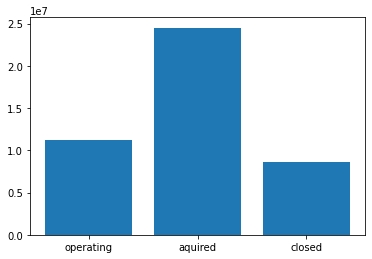

In [242]:
plt.bar(statuses['status'], statuses['mean'])

In Conclusion, not getting enough funding can critically affect the company's chance of success. This indicates that the companies must focus more on finding fundings and investments into their startups.

Regarding the second approach, we will look now at the closed companies that recieved more than one funding round:

Now we will look at the time before the first funding were the fundings for the closed companies. We will ignore the negative signs and consider its absolute values as it might have one date came before the other or it might have been subtracted by 0 in case it received more than one funding on the same day. To solve the negatives problem we will perfom absolute function.

In [243]:
comp_rounds = companies.set_index('company_name')
comp_rounds['time_before_first_fund'] = comp_rounds['time_before_first_fund'].abs()
comp_rounds = comp_rounds.sort_values('time_before_first_fund', ascending=False)


In [244]:
closedcomp_rounds = comp_rounds[comp_rounds['status'] == 'closed']
closedcomp_rounds

,company_permalink,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
company_name,,,,,,,,,,,,
The National Urban League,/organization/the-national-urban-league,http://nul.iamempowered.com/,missing,300000.0,closed,missing,missing,1,1910-01-01,2015-10-30,2015-10-30,38653 days
Selectron,/organization/selectron,http://www.selectron.ch/de/index.php,Industrial|Industrial Automation,7962962.0,closed,CHE,Lyss,1,1956-01-01,2009-07-01,2009-07-01,19540 days
Wallerius,/organization/wallerius,NaN,Consumer Goods|Food Processing|Specialty Foods,233644.0,closed,BRA,Rio Grande Do Sul,1,1955-01-01,2006-12-12,2006-12-12,18973 days
Signicast,/organization/signicast,http://www.signicast.com/,missing,0.0,closed,USA,Hartford,1,1959-01-01,2008-06-12,2008-06-12,18060 days
Impact Products,/organization/impact-products,http://www.impact-products.com/,missing,0.0,closed,USA,Toledo,1,1963-01-01,2010-08-31,2010-08-31,17409 days
...,...,...,...,...,...,...,...,...,...,...,...,...
Poke'n Call,/organization/poken-call,http://www.pokencall.com,Facebook Applications|Internet|Search|Social M...,50000.0,closed,missing,missing,1,2011-07-01,2011-07-01,2011-07-01,0 days
Firmpalace.com,/organization/firmpalace-com,https://firmpalace.com,missing,0.0,closed,HUN,Budapest,1,2015-01-01,2015-01-01,2015-01-01,0 days
Fleck,/organization/fleck,http://www.techcrunch.com/2008/10/16/fleck-hea...,Curated Web,286839.0,closed,NLD,Amsterdam,1,2006-11-01,2006-11-01,2006-11-01,0 days


As seen below and in the above dataframe that the biggest gap between fundingand the foundation was 38653 days which seems to be a significant gap on getting funded.

In [245]:
operatingcomp_rounds = comp_rounds[comp_rounds['status'] == 'operating']
operatingcomp_rounds

,company_permalink,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
company_name,,,,,,,,,,,,
Rutgers University,/organization/rutgers-university,http://www.rutgers.edu,Education,1950000.0,operating,USA,New Brunswick,1,1766-01-01,2015-03-25,2015-03-25,91028 days
University of New Brunswick,/organization/university-of-new-brunswick,http://www.unb.ca,missing,2000000.0,operating,CAN,missing,1,1785-01-01,2014-05-15,2014-05-15,83774 days
University of Pittsburgh,/organization/university-of-pittsburgh-main,http://www.pitt.edu/,Education,2100000.0,operating,USA,Pittsburgh,1,1787-01-01,2015-10-22,2015-10-22,83569 days
Georgetown University,/organization/georgetown-university,http://www.georgetown.edu,Education,10000000.0,operating,USA,Washington,1,1789-01-01,2014-02-11,2014-02-11,82220 days
Aspen Park Pharmaceuticals,/organization/aspen-park-pharmaceuticals,NaN,Health Care|Medical|Pharmaceuticals,0.0,operating,FRA,Durban,1,1816-01-01,2014-12-10,2014-12-10,72662 days
...,...,...,...,...,...,...,...,...,...,...,...,...
PlayyOn,/organization/playyon,http://www.playyon.com,Advertising|Event Management|Fitness|Health an...,255000.0,operating,USA,Menlo Park,2,2013-01-15,2013-01-15,2014-01-30,0 days
Flint Capital,/organization/flint-capital,http://www.flintcap.com,Advertising|Enterprises|Finance Technology|Mob...,100000000.0,operating,ESP,Barcelona,3,2013-05-13,2013-05-13,2015-04-29,0 days
Plobot,/organization/plobot,http://plobot.com,Digital Entertainment|Education|Technology,0.0,operating,missing,missing,1,2015-09-01,2015-09-01,2015-09-01,0 days


Seeing that the gap between fundingand establishment either the operating companies or the closed ones, it seems the operating companies had bigger gaps. so it may appear that the time between the foundtion and the first funding isn't an effective factor.

In conclusion, time taken to get a funding can be considered a non-critical factor in affecting the success of the company. It means that once the company rceives the funding nomatter when as long as it's suffcient (based on the last observation) it will get the company operating.

## Question 2 (Ashraf & Farah)

Regarding the Second Question:  <br>
- 	Which regions (countries) are most probable to have the most failed startups?
    -	For this: We are initially interested in <br> `country_code`, `status`, and `investor_name`


First we need to join the companies dataset with the investments dataset

In [246]:
companies.sort_values(by=['company_name'], inplace=True)
invests.sort_values(by=['company_name'],inplace=True)
comp_invests = companies.join(invests.set_index('company_name'), on='company_name',lsuffix='_left', rsuffix='_right')
comp_invests

,company_permalink_left,company_name,homepage_url,company_category_list_left,funding_total_usd,status,company_country_code_left,company_city_left,funding_rounds,founded_at,...,investor_name,investor_country_code,investor_state_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,total_raised
8387,/organization/bratpackstyle-llc,"#BratPackStyle, LLC.",http://www.bratpackstyle.com,Content Discovery|E-Commerce|Fashion|Lifestyle...,0.000000e+00,closed,USA,New York,1,2015-04-19 00:00:00.000000000,...,Nine Inc. LLC.,missing,missing,missing,/funding-round/7f52613bbda1edcaed3844d806d62757,seed,NaN,2015-06-01,1.493930e+07,NaN
24857,/organization/hashoff,#HASHOFF,http://www.hashoff.com,Digital Media|Internet|Social Media,9.550000e+05,operating,USA,Denver,2,2014-04-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
63213,/organization/waywire,#waywire,http://www.waywire.com,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1,2012-06-01 00:00:00.000000000,...,Oprah Winfrey,missing,missing,missing,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
63213,/organization/waywire,#waywire,http://www.waywire.com,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1,2012-06-01 00:00:00.000000000,...,Innovation Endeavors,USA,CA,Palo Alto,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,/organization/enso,Еnso.fm,http://enso.fm,Algorithms|Casual Games|Content Discovery|Edis...,2.783840e+04,operating,BGR,Sofia,1,2015-06-29 00:00:00.000000000,...,Axel Springer Plug and Play Accelerator,DEU,16,Berlin,/funding-round/53becfd9582cda62dcb2a6c9970810b3,seed,NaN,2015-07-01,2.783840e+04,2.783840e+04
51461,/organization/shwrm,​Shwrüm,http://www.shwrum.com,Design|Fashion|Internet|Mobile|Shopping|Software,5.000000e+04,operating,USA,Gainesville,1,2013-01-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
63626,/organization/wested,​WestEd,http://www.wested.org/,Nonprofits,3.000000e+06,operating,USA,San Francisco,1,2010-10-27 20:46:43.240577680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
10964,/organization/chishenma,吃神马 ChiShenMa,http://chishen.ma,Mobile|Restaurants|Specialty Foods,0.000000e+00,operating,CHN,Shanghai,1,2014-01-01 00:00:00.000000000,...,Chinaccelerator,CHN,23,Shanghai,/funding-round/aa4cde05f64453c60ca85a06a962f381,seed,NaN,2014-02-28,1.493930e+07,NaN


In [247]:
comp_invests.T

,8387,24857,0,63213,63213,63213,63213,63213,63213,59910,...,66366,6454,66367,31300,18356,18356,51461,63626,10964,10964
company_permalink_left,/organization/bratpackstyle-llc,/organization/hashoff,/organization/-fame,/organization/waywire,/organization/waywire,/organization/waywire,/organization/waywire,/organization/waywire,/organization/waywire,/organization/tv-communications,...,/organization/Ôasys-2,/organization/berresearch,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,/organization/kutusu-video-ajans,/organization/enso,/organization/enso,/organization/shwrm,/organization/wested,/organization/chishenma,/organization/chishenma
company_name,"#BratPackStyle, LLC.",#HASHOFF,#fame,#waywire,#waywire,#waywire,#waywire,#waywire,#waywire,&TV Communications,...,Ôasys,ÜberResearch,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,İş kutusu video ajansı,Еnso.fm,Еnso.fm,​Shwrüm,​WestEd,吃神马 ChiShenMa,吃神马 ChiShenMa
homepage_url,http://www.bratpackstyle.com,http://www.hashoff.com,http://livfame.com,http://www.waywire.com,http://www.waywire.com,http://www.waywire.com,http://www.waywire.com,http://www.waywire.com,http://www.waywire.com,http://enjoyandtv.com,...,http://www.oasys.io/,http://uberresearch.com,http://inovatiff.com,http://www.iskutusu.com,http://enso.fm,http://enso.fm,http://www.shwrum.com,http://www.wested.org/,http://chishen.ma,http://chishen.ma
company_category_list_left,Content Discovery|E-Commerce|Fashion|Lifestyle...,Digital Media|Internet|Social Media,Media,Entertainment|News|Politics|Social Media,Entertainment|News|Politics|Social Media,Entertainment|News|Politics|Social Media,Entertainment|News|Politics|Social Media,Entertainment|News|Politics|Social Media,Entertainment|News|Politics|Social Media,Games,...,Consumer Electronics|Internet of Things|Teleco...,Curated Web,Consumer Goods|E-Commerce|Internet,3D|Advertising|Online Video Advertising|Video,Algorithms|Casual Games|Content Discovery|Edis...,Algorithms|Casual Games|Content Discovery|Edis...,Design|Fashion|Internet|Mobile|Shopping|Software,Nonprofits,Mobile|Restaurants|Specialty Foods,Mobile|Restaurants|Specialty Foods
funding_total_usd,0.0,955000.0,10000000.0,1750000.0,1750000.0,1750000.0,1750000.0,1750000.0,1750000.0,4000000.0,...,18192.0,0.0,14851.0,100000.0,27838.40363,27838.40363,50000.0,3000000.0,0.0,0.0
status,closed,operating,operating,acquired,acquired,acquired,acquired,acquired,acquired,operating,...,operating,operating,operating,operating,operating,operating,operating,operating,operating,operating
company_country_code_left,USA,USA,IND,USA,USA,USA,USA,USA,USA,USA,...,USA,DEU,missing,TUR,BGR,BGR,USA,USA,CHN,CHN
company_city_left,New York,Denver,Mumbai,New York,New York,New York,New York,New York,New York,Los Angeles,...,San Francisco,Cologne,missing,Istanbul,Sofia,Sofia,Gainesville,San Francisco,Shanghai,Shanghai
funding_rounds,1,2,1,1,1,1,1,1,1,2,...,1,1,1,1,1,1,1,1,1,1
founded_at,2015-04-19 00:00:00,2014-04-01 00:00:00,2011-04-12 20:46:43.240577680,2012-06-01 00:00:00,2012-06-01 00:00:00,2012-06-01 00:00:00,2012-06-01 00:00:00,2012-06-01 00:00:00,2012-06-01 00:00:00,2006-09-09 20:46:43.240577680,...,2014-01-01 00:00:00,2013-01-01 00:00:00,2010-01-06 20:46:43.240577680,2013-01-01 00:00:00,2015-06-29 00:00:00,2015-06-29 00:00:00,2013-01-01 00:00:00,2010-10-27 20:46:43.240577680,2014-01-01 00:00:00,2014-01-01 00:00:00


Now, we will categorize the companies according to their status (oprating, closed, aquired)

In [248]:
closedcomp_invests = comp_invests[comp_invests['status'] == 'closed']
closedcomp_invests

,company_permalink_left,company_name,homepage_url,company_category_list_left,funding_total_usd,status,company_country_code_left,company_city_left,funding_rounds,founded_at,...,investor_name,investor_country_code,investor_state_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,total_raised
8387,/organization/bratpackstyle-llc,"#BratPackStyle, LLC.",http://www.bratpackstyle.com,Content Discovery|E-Commerce|Fashion|Lifestyle...,0.0,closed,USA,New York,1,2015-04-19 00:00:00.000000000,...,Nine Inc. LLC.,missing,missing,missing,/funding-round/7f52613bbda1edcaed3844d806d62757,seed,NaN,2015-06-01,1.493930e+07,NaN
11998,/organization/club-domains,.Club Domains,http://nic.club/,Software,7000000.0,closed,USA,Oakland Park,1,2011-10-10 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
21459,/organization/fox-networks,.FOX Networks,http://www.dotfox.com,Advertising,4912393.0,closed,missing,missing,1,2003-04-23 20:46:43.240577680,...,Foresight Group,GBR,H9,London,/funding-round/69a1536a6f4506538afd7aa7241ddbe1,undisclosed,NaN,2007-01-16,4.912393e+06,4912393.0
12521,/organization/comdominio,.comDominio,http://www.comdominio.com.br,Internet,0.0,closed,BRA,Brazilia,1,2000-05-19 20:46:43.240577680,...,Stratus Investimentos,missing,missing,missing,/funding-round/f39abc561eeeb14307837363e54d7e16,venture,NaN,2004-02-12,1.493930e+07,NaN
34,/organization/10bestthings,10BestThings,http://10bestthings.com,Curated Web,50000.0,closed,USA,Cleveland,1,2009-04-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64831,/organization/xkoto,xkoto,http://www.xkoto.com,Software,11035000.0,closed,USA,Waltham,3,2005-01-01 00:00:00.000000000,...,GrandBanks Capital,USA,MA,Wellesley,/funding-round/b91008080714512f7c78656ed27238ab,venture,C,2009-01-26,3.000000e+06,4307000.0
65152,/organization/yes-no,yes.no,http://yes.no,Q&A|Social Network Media,1000000.0,closed,ISR,Tel Aviv,1,2015-01-01 00:00:00.000000000,...,Assaf Levy,ISR,missing,Tel Aviv,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,NaN,2015-05-01,1.000000e+06,1000000.0
65291,/organization/yoone,yoone,http://yoone.de,Games,197597.0,closed,DEU,Bielefeld,1,2010-11-03 00:00:00.000000000,...,HackFwd,DEU,4,Hamburg,/funding-round/9ee9e539e722753d4fb6b03e7800fb8a,seed,NaN,2010-11-03,1.975970e+05,197597.0
65293,/organization/yoonew,yoonew,http://www.yoonew.com,Curated Web,4000000.0,closed,USA,New York,2,2004-01-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


We will group by the country to see the number of companies (of each status) in each country to gain insight if there's a massive difference between the number of operating companies and closed ones in a single country.

In [249]:
closedcomptotal = pd.DataFrame(closedcomp_invests.groupby(['company_country_code_left'])['company_name'].count())
closedcomptotal.drop('missing',inplace=True)
closedcomptotal = closedcomptotal.sort_values('company_name', ascending=False)
closedcomptotal

,company_name
company_country_code_left,
USA,7956
GBR,567
CAN,370
RUS,252
FRA,199
...,...
PRI,1
DOM,1
GHA,1


Here's a heatmap that illustrates the previous dataframe. It shows us clearly that the US has the most closed companies while others have less. We will take a sample of the first 10 and consider the rest outliers (as their values are 1) because it will be hard to visualize them and their valus won't affect the analysis much.

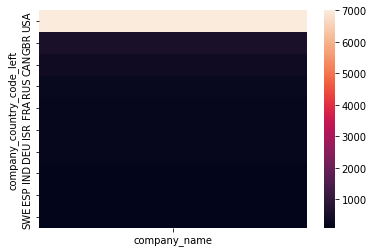

In [250]:
closedcomptotalsample = closedcomptotal.head(10)
sns.heatmap(closedcomptotalsample, vmin=100, vmax=7000);

Now we categorize the operating companies

In [251]:
operatingcomp_invests = comp_invests[comp_invests['status'] == 'operating']
operatingcomp_invests

,company_permalink_left,company_name,homepage_url,company_category_list_left,funding_total_usd,status,company_country_code_left,company_city_left,funding_rounds,founded_at,...,investor_name,investor_country_code,investor_state_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,total_raised
24857,/organization/hashoff,#HASHOFF,http://www.hashoff.com,Digital Media|Internet|Social Media,9.550000e+05,operating,USA,Denver,2,2014-04-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
0,/organization/-fame,#fame,http://livfame.com,Media,1.000000e+07,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
59910,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,Games,4.000000e+06,operating,USA,Los Angeles,2,2006-09-09 20:46:43.240577680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
48690,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,Education|Publishing,6.038500e+04,operating,EST,Tallinn,2,2012-10-26 00:00:00.000000000,...,Startup Wise Guys,EST,1,Tallinn,/funding-round/f28a7e530f9e4b29783d2c0aa4c68c62,seed,NaN,2013-12-01,2.038500e+04,30192.50000
48690,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,Education|Publishing,6.038500e+04,operating,EST,Tallinn,2,2012-10-26 00:00:00.000000000,...,Start-Up Chile,CHL,12,Santiago,/funding-round/f06b420775f7cb6c1541a9db526534bb,seed,NaN,2012-08-09,4.000000e+04,30192.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18356,/organization/enso,Еnso.fm,http://enso.fm,Algorithms|Casual Games|Content Discovery|Edis...,2.783840e+04,operating,BGR,Sofia,1,2015-06-29 00:00:00.000000000,...,Axel Springer Plug and Play Accelerator,DEU,16,Berlin,/funding-round/53becfd9582cda62dcb2a6c9970810b3,seed,NaN,2015-07-01,2.783840e+04,27838.40363
51461,/organization/shwrm,​Shwrüm,http://www.shwrum.com,Design|Fashion|Internet|Mobile|Shopping|Software,5.000000e+04,operating,USA,Gainesville,1,2013-01-01 00:00:00.000000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
63626,/organization/wested,​WestEd,http://www.wested.org/,Nonprofits,3.000000e+06,operating,USA,San Francisco,1,2010-10-27 20:46:43.240577680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
10964,/organization/chishenma,吃神马 ChiShenMa,http://chishen.ma,Mobile|Restaurants|Specialty Foods,0.000000e+00,operating,CHN,Shanghai,1,2014-01-01 00:00:00.000000000,...,Chinaccelerator,CHN,23,Shanghai,/funding-round/aa4cde05f64453c60ca85a06a962f381,seed,NaN,2014-02-28,1.493930e+07,NaN


We will group by the country and see how many operating companies in each country.

In [252]:
operatingtotal = pd.DataFrame(operatingcomp_invests.groupby(['company_country_code_left'])['company_name'].count())
operatingtotal.drop('missing',inplace=True)
operatingtotal = operatingtotal.sort_values('company_name', ascending=False)
operatingtotal

,company_name
company_country_code_left,
USA,92228
GBR,7846
CAN,3648
IND,3393
CHN,3325
...,...
SEN,1
ROU,1
QAT,1


The heatmap yet again shows that the US has the most operating companies which seems noticable because it also had the most closed companies.We will take a sample of the first 10 and consider the rest outliers (as their values are 1) because it will be hard to visualize them and their valus won't affect the analysis much.

<AxesSubplot:ylabel='company_country_code_left'>

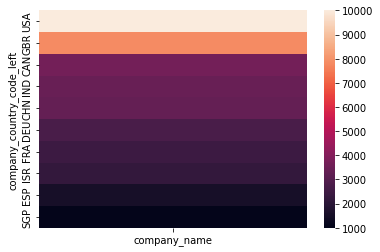

In [253]:
operatingtotalsample = operatingtotal.head(10)
operatingtotalsample
sns.heatmap(operatingtotalsample, vmin=1000, vmax=10000)

After looking in the closed and operating companies we see that we still can't determine if the country has more operting companies than the closed or not, so let's take one country and compare. For example, let's look at the USA since it has the highest number of operating companies and closed companies.

In [254]:
df = comp_invests.loc[comp_invests['company_country_code_left'] == 'USA']
df = pd.DataFrame(df.groupby(['status'])['status'].count())
df

,status
status,
acquired,22485
closed,7956
ipo,5302
operating,92228


The dataframe above shows us how although the US has strong economics and massive amount of investor as seen earlier, it has a bulk of closed companies but compared to operting it's only 0.08 (7956/92228) of it. So, this reflects that The US must have facilities and enough fundings for startups.

If we quickly look at another example and that is the country after the US which is The United Kingdom (GBR) it had 7846 oeprating company with 567 closed companies. Ofcourse, since the US is much bigger the number are biggr but we will look at the ratio between the closed to operating companies to find it 0.07. SIgnificantly it is closed to the US and we can consider that both countries have the same facilities and both show that the lack of investors can affect the companies.

In conclusion, as the ratio the ratio between the closed to operating companies increases, the more dificult it is for a company to start up. This will lead us to look closed into factors that makes those countries a difficult place to start a company.

## Question 3 (Farah)

### How the number of investors in a country can affect the number of successful companies in this country?

First, let's narrow down to the investors that invested in the companies in the same country because there's a posibility that an investor invested in a company in a different country.

In [255]:
comp_investors = invests[invests['company_country_code'] == invests['investor_country_code']]
comp_investors

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,total_raised
160690,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/innovation-endeavors,Innovation Endeavors,USA,CA,Palo Alto,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
160689,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/first-round-capital,First Round,USA,CA,San Francisco,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
160688,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/afsquare,AFSquare,USA,CA,Culver City,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
160693,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/person/troy-carter,Troy Carter,USA,missing,Culver City,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
160691,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/person/jeff-weiner,Jeff Weiner,USA,missing,Mountain View,/funding-round/cc409188fa2b63482bd9008f682c2efa,seed,NaN,2012-06-30,1.750000e+06,1.750000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60815,/organization/gps-optics,µ-GPS Optics,Hardware + Software,DEU,15,Meiningen,/organization/mic-ag,Mic AG,DEU,2,Munich,/funding-round/24c3f275dd46990719a1f82a402d8b5c,venture,NaN,2006-12-01,4.000000e+04,4.000000e+04
168644,/organization/Áeron,ÁERON,missing,missing,missing,missing,/organization/sz-chenyi-capital-fund-management,Széchenyi Capital Fund Management,missing,missing,missing,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,2014-08-01,1.493930e+07,NaN
168646,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,missing,missing,missing,/person/serkan-erdoğan,Serkan Erdoğan,missing,missing,missing,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,2013-10-01,1.485100e+04,1.485100e+04
47814,/organization/enso,Еnso.fm,Algorithms|Casual Games|Content Discovery|Edis...,BGR,42,Sofia,/organization/eleven,Eleven,BGR,42,Sofia,/funding-round/53becfd9582cda62dcb2a6c9970810b3,seed,NaN,2015-07-01,2.783840e+04,2.783840e+04


Now, let's merge the new dataset with companies so we can get the status.

In [256]:
comp_investors = comp_investors.join(companies.set_index('company_name'), on='company_name',lsuffix='_left', rsuffix='_right')
comp_investors

,company_permalink_left,company_name,company_category_list_left,company_country_code_left,company_state_code,company_city_left,investor_permalink,investor_name,investor_country_code,investor_state_code,...,company_category_list_right,funding_total_usd,status,company_country_code_right,company_city_right,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
160690,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/innovation-endeavors,Innovation Endeavors,USA,CA,...,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1.0,2012-06-01 00:00:00.000000000,2012-06-30,2012-06-30,29 days 00:00:00
160689,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/first-round-capital,First Round,USA,CA,...,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1.0,2012-06-01 00:00:00.000000000,2012-06-30,2012-06-30,29 days 00:00:00
160688,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/organization/afsquare,AFSquare,USA,CA,...,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1.0,2012-06-01 00:00:00.000000000,2012-06-30,2012-06-30,29 days 00:00:00
160693,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/person/troy-carter,Troy Carter,USA,missing,...,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1.0,2012-06-01 00:00:00.000000000,2012-06-30,2012-06-30,29 days 00:00:00
160691,/organization/waywire,#waywire,Entertainment|News|Politics|Social Media,USA,NY,New York,/person/jeff-weiner,Jeff Weiner,USA,missing,...,Entertainment|News|Politics|Social Media,1.750000e+06,acquired,USA,New York,1.0,2012-06-01 00:00:00.000000000,2012-06-30,2012-06-30,29 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60815,/organization/gps-optics,µ-GPS Optics,Hardware + Software,DEU,15,Meiningen,/organization/mic-ag,Mic AG,DEU,2,...,Hardware + Software,4.000000e+04,operating,DEU,Meiningen,1.0,2006-01-01 00:00:00.000000000,2006-12-01,2006-12-01,334 days 00:00:00
168644,/organization/Áeron,ÁERON,missing,missing,missing,missing,/organization/sz-chenyi-capital-fund-management,Széchenyi Capital Fund Management,missing,missing,...,missing,0.000000e+00,operating,HUN,missing,1.0,2011-01-01 00:00:00.000000000,2014-08-01,2014-08-01,1308 days 00:00:00
168646,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,missing,missing,missing,/person/serkan-erdoğan,Serkan Erdoğan,missing,missing,...,Consumer Goods|E-Commerce|Internet,1.485100e+04,operating,missing,missing,1.0,2010-01-06 20:46:43.240577680,2013-10-01,2013-10-01,1363 days 03:13:16.759422320
47814,/organization/enso,Еnso.fm,Algorithms|Casual Games|Content Discovery|Edis...,BGR,42,Sofia,/organization/eleven,Eleven,BGR,42,...,Algorithms|Casual Games|Content Discovery|Edis...,2.783840e+04,operating,BGR,Sofia,1.0,2015-06-29 00:00:00.000000000,2015-07-01,2015-07-01,2 days 00:00:00


Then we will categorize our data according to its status.

In [257]:
operatingcomp_invests = comp_investors[comp_investors['status'] == 'operating']
operatingcomp_invests

,company_permalink_left,company_name,company_category_list_left,company_country_code_left,company_state_code,company_city_left,investor_permalink,investor_name,investor_country_code,investor_state_code,...,company_category_list_right,funding_total_usd,status,company_country_code_right,company_city_right,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
123699,/organization/rock-your-paper,'Rock' Your Paper,Education|Publishing,EST,1,Tallinn,/organization/startup-wise-guys,Startup Wise Guys,EST,1,...,Education|Publishing,6.038500e+04,operating,EST,Tallinn,2.0,2012-10-26 00:00:00.000000000,2012-08-09,2013-12-01,-78 days +00:00:00
25583,/organization/caravelo,( caravelo (,Information Technology|Online Travel,ESP,56,Barcelona,/organization/fundacin-jos-manuel-entrecanales,Fundación José Manuel Entrecanales,ESP,29,...,Information Technology|Online Travel,1.089811e+06,operating,ESP,Barcelona,2.0,2010-05-01 00:00:00.000000000,2012-01-01,2015-07-22,610 days 00:00:00
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,...,Curated Web,2.000000e+06,operating,CHN,Beijing,1.0,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443 days 00:00:00
2,/organization/01games-technology,01Games Technology,Games,HKG,missing,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,missing,...,Games,4.125000e+04,operating,HKG,Hong Kong,1.0,2010-10-06 20:46:43.240577680,2014-07-01,2014-07-01,1363 days 03:13:16.759422320
30,/organization/1-2-3-listo,"1,2,3 Listo",E-Commerce,CHL,12,Las Condes,/organization/start-up-chile,Start-Up Chile,CHL,12,...,E-Commerce,4.000000e+04,operating,CHL,Las Condes,1.0,2012-01-01 00:00:00.000000000,2013-02-18,2013-02-18,414 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60815,/organization/gps-optics,µ-GPS Optics,Hardware + Software,DEU,15,Meiningen,/organization/mic-ag,Mic AG,DEU,2,...,Hardware + Software,4.000000e+04,operating,DEU,Meiningen,1.0,2006-01-01 00:00:00.000000000,2006-12-01,2006-12-01,334 days 00:00:00
168644,/organization/Áeron,ÁERON,missing,missing,missing,missing,/organization/sz-chenyi-capital-fund-management,Széchenyi Capital Fund Management,missing,missing,...,missing,0.000000e+00,operating,HUN,missing,1.0,2011-01-01 00:00:00.000000000,2014-08-01,2014-08-01,1308 days 00:00:00
168646,/organization/İnovatiff-reklam-ve-tanıtım-hizm...,İnovatiff Reklam ve Tanıtım Hizmetleri Tic,Consumer Goods|E-Commerce|Internet,missing,missing,missing,/person/serkan-erdoğan,Serkan Erdoğan,missing,missing,...,Consumer Goods|E-Commerce|Internet,1.485100e+04,operating,missing,missing,1.0,2010-01-06 20:46:43.240577680,2013-10-01,2013-10-01,1363 days 03:13:16.759422320
47814,/organization/enso,Еnso.fm,Algorithms|Casual Games|Content Discovery|Edis...,BGR,42,Sofia,/organization/eleven,Eleven,BGR,42,...,Algorithms|Casual Games|Content Discovery|Edis...,2.783840e+04,operating,BGR,Sofia,1.0,2015-06-29 00:00:00.000000000,2015-07-01,2015-07-01,2 days 00:00:00


In [258]:
closedcomp_invests = comp_investors[comp_investors['status'] == 'closed']
closedcomp_invests

,company_permalink_left,company_name,company_category_list_left,company_country_code_left,company_state_code,company_city_left,investor_permalink,investor_name,investor_country_code,investor_state_code,...,company_category_list_right,funding_total_usd,status,company_country_code_right,company_city_right,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
128,/organization/11i-solutions,11i Solutions,Enterprise Software,USA,AL,Huntsville,/organization/steel-pier-capital-advisors,Steel Pier Capital Advisors,USA,NY,...,Enterprise Software,1800000.0,closed,USA,Huntsville,1.0,2007-06-27 20:46:43.240577680,2011-03-22,2011-03-22,1363 days 03:13:16.759422320
238,/organization/1c-company,1C Company,Games|Software|Video Games,RUS,48,Moscow,/organization/baring-vostok-capital-partners,Baring Vostok Capital Partners,RUS,48,...,Games|Software|Video Games,200000000.0,closed,RUS,Moscow,1.0,1991-01-01 00:00:00.000000000,2011-10-03,2011-10-03,7580 days 00:00:00
239,/organization/1cast,1Cast,Content|Lifestyle|News|Video,USA,WA,Kirkland,/organization/eagle-river-holdings,Eagle River Holdings,USA,WA,...,Content|Lifestyle|News|Video,0.0,closed,USA,Kirkland,1.0,2006-06-01 00:00:00.000000000,2008-08-12,2008-08-12,803 days 00:00:00
341,/organization/2100b-com-llc,2100b Sausalito LLC.,Advertising|Direct Marketing|Social Media,USA,CA,Sausalito,/organization/seikouri-inc,"SEIKOURI, Inc.",USA,NY,...,Advertising|Direct Marketing|Social Media,50000.0,closed,USA,Sausalito,2.0,2011-06-15 00:00:00.000000000,2013-01-01,2013-01-01,566 days 00:00:00
422,/organization/25eight,25eight,DIY|Electronics|Software,USA,CA,San Francisco,/organization/innovation-works,Innovation Works,USA,PA,...,DIY|Electronics|Software,25000.0,closed,USA,San Francisco,1.0,2006-05-03 20:46:43.240577680,2010-01-26,2010-01-26,1363 days 03:13:16.759422320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164453,/organization/xlander-ru,xLander.ru,Adventure Travel|Reviews and Recommendations|S...,missing,missing,missing,/organization/aurora-venture-capital-fund,Aurora Venture Capital Fund,missing,missing,...,Adventure Travel|Reviews and Recommendations|S...,1000000.0,closed,missing,missing,1.0,2008-10-09 20:46:43.240577680,2012-07-04,2012-07-04,1363 days 03:13:16.759422320
164443,/organization/xkoto,xkoto,Software,USA,MA,Waltham,/organization/grandbanks-capital,GrandBanks Capital,USA,MA,...,Software,11035000.0,closed,USA,Waltham,3.0,2005-01-01 00:00:00.000000000,2005-11-01,2009-01-26,304 days 00:00:00
164444,/organization/xkoto,xkoto,Software,USA,MA,Waltham,/organization/grandbanks-capital,GrandBanks Capital,USA,MA,...,Software,11035000.0,closed,USA,Waltham,3.0,2005-01-01 00:00:00.000000000,2005-11-01,2009-01-26,304 days 00:00:00
165195,/organization/yes-no,yes.no,Q&A|Social Network Media,ISR,5,Tel Aviv,/person/assaf-levy-3,Assaf Levy,ISR,missing,...,Q&A|Social Network Media,1000000.0,closed,ISR,Tel Aviv,1.0,2015-01-01 00:00:00.000000000,2015-05-01,2015-05-01,120 days 00:00:00


Next, we will group by the investor's country to see how many investors in each country invested in the operating companies.

In [259]:
operatingcomp_investstotal = pd.DataFrame(operatingcomp_invests.groupby(['investor_country_code'])['investor_name'].count())
operatingcomp_investstotal.drop('missing',inplace=True)
operatingcomp_investstotal = operatingcomp_investstotal.sort_values('investor_name', ascending=False)
operatingcomp_investstotal

,investor_name
investor_country_code,
USA,57626
GBR,3518
CHN,1399
CAN,1314
FRA,1282
...,...
CYP,1
LUX,1
PSE,1


Let's visualize our findinfs through a sample of the dataframe

<AxesSubplot:ylabel='investor_country_code'>

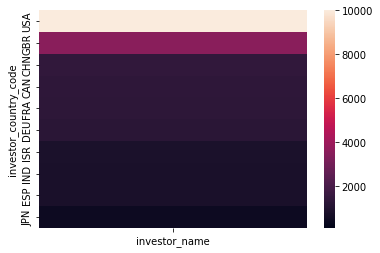

In [260]:
operatingcomp_investstotal = operatingcomp_investstotal.head(10)
sns.heatmap(operatingcomp_investstotal, vmin=100, vmax=10000)

We will do the same for the closed companies

In [261]:
closedcomp_investstotal = pd.DataFrame(closedcomp_invests.groupby(['investor_country_code'])['investor_name'].count())
closedcomp_investstotal.drop('missing',inplace=True)
closedcomp_investstotal = closedcomp_investstotal.sort_values('investor_name', ascending=False)
closedcomp_investstotal

,investor_name
investor_country_code,
USA,5134
GBR,276
CAN,142
RUS,98
FRA,88
DEU,78
ISR,76
SWE,41
ESP,34


<AxesSubplot:ylabel='investor_country_code'>

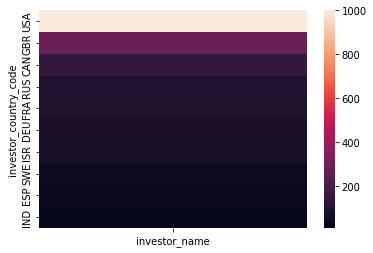

In [262]:
closedcomp_investstotal = closedcomp_investstotal.head(10)
sns.heatmap(closedcomp_investstotal, vmin=10, vmax=1000)

We can see from the data obtained how the number of investors in general in the closed companies is significantlly lower than the those who invested in the operating ones. This can be seen by establishing a ratio between the investors in closed companies to the investors in the operating companies and we will see the difference.

In conclusion, investing plays an important part in keeping the company operating. As the number of investors increases, the chance of success increases.

## Rest of Questions (Aisha)

Heads-up: 
1) Here I didn't use the cleaned dataset version, as we can infer some insights from the null values
2)Some of the data could have been better if they were represented in charts but due to their data types it wasn't really possible and some of the others with favorable data types had labelling merging with one another making it impossible to read.

### Question 4 : Analyzing Funding Rounds

We'll check the number of times funding is repeated overall irrespective of the differenece in company status and then we will see the company statuses.

#### Companies data set

In [267]:
import pandas as pd
df=pd.read_csv('datasets/startups/companies.csv')
df.head()


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,1/5/2015,1/5/2015
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,9/4/2014,3/1/2014,10/14/2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,1/30/2014,1/30/2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,1/1/2007,3/19/2008,3/19/2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,1/1/2010,7/24/2014,7/24/2014


In [268]:
df.drop(['state_code', 'region'],axis=1,inplace=True)
df['first_funding_at']=df['first_funding_at'].fillna("not available")
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,Mumbai,1,NaN,1/5/2015,1/5/2015
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,Delaware City,2,9/4/2014,3/1/2014,10/14/2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,1,NaN,1/30/2014,1/30/2014
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,Beijing,1,1/1/2007,3/19/2008,3/19/2008
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,Champaign,1,1/1/2010,7/24/2014,7/24/2014


Text(0.5, 1.0, 'status difference')

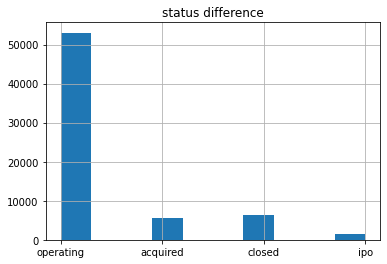

In [269]:
import matplotlib.pyplot as plt
df.status.hist()
plt.title('status difference')

As the histogram above shows, we have more companies operating as compared to acquired ones which would imply that they received far more funding and produced more than those which were acquired.

#### IPO companies?

It's a situation in which one starts a business by soliciting capital from family, friends, and investors in exchange for a portion of the company. We go to an investor bank and inform them about the idea or product to raise money for this company. They will then introduce us to institutional investors / people who are interested in this idea or product, and they will sell some of the business's shares to assist in bringing the company to the public market. This helps raise a lot of money, sell shares at a reasonable price that suits the shareholder, raise more money through additional rounds of investment, and promote the brand because IPOs deliver a good credibility boost.
The disadvantages include:
When it comes to matters like openness, the SEC (Securities and Exchange Commission is the US federal agency in charge of regulating and managing financial markets) and exchanges have stringent criteria. As a result, public firms are required to reveal a great deal of business-related information, which may result in competitors obtaining access to material that is the company's trade secret.
Less control as shareholders will now affect decision making.


We'll now separate companies in to 3 status categories; operating, acquired, and ipo. Then we'll compare the funding rounds based on these statuses.

In [270]:
operating=df.loc[df['status']=='operating']
acquired=df.loc[df['status']=='acquired']
ipo=df.loc[df['status']=='ipo']

#### 1-Operating companies

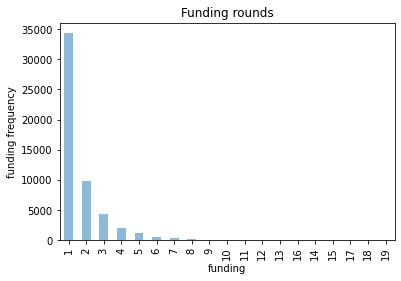

In [271]:

import matplotlib.pyplot as plt
operating.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

The above curve can be matched to the values below and we can deduce that operating companies get more one time funding rounds that two.

In [272]:
operating['funding_rounds'].value_counts()

1     34367
2      9871
3      4366
4      2066
5      1119
6       554
7       312
8       150
9        91
10       55
11       31
12       24
13       11
16        5
14        4
15        3
17        2
18        2
19        1
Name: funding_rounds, dtype: int64

Now we will see how this differs from acquired companies.

#### 2-Acquired companies 

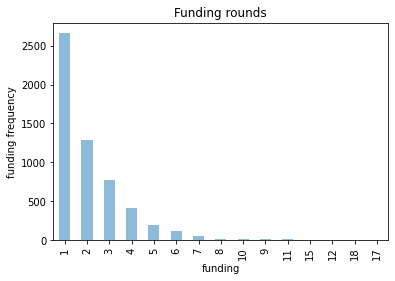

In [273]:
#acquired companies

plt.title('funding rounds for aqcuired companies')
acquired.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

This can be confirmed and further understood with the values below.

In [274]:
acquired['funding_rounds'].value_counts()

1     2664
2     1287
3      772
4      411
5      194
6      115
7       54
8       15
10      13
9       11
11       9
15       1
12       1
18       1
17       1
Name: funding_rounds, dtype: int64

As we can see, both operating and acquired companies get more one time funding rounds than 2 with operating companies having by far the largest fundings. For IPO companies is illustrated below.

#### 3-IPO companies

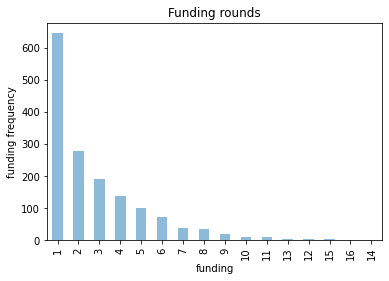

In [275]:
#ipo companies
import matplotlib.pyplot as plt

plt.title('funding rounds for IPO companies')
ipo.funding_rounds.value_counts().plot(kind="bar",alpha=0.5)
plt.title('Funding rounds')
plt.xlabel('funding')
plt.ylabel('funding frequency') 
plt.show()

In [276]:
ipo['funding_rounds'].value_counts()

1     646
2     277
3     192
4     137
5     100
6      72
7      39
8      36
9      18
10     10
11      9
13      4
12      3
15      2
16      1
14      1
Name: funding_rounds, dtype: int64

We can conclude that operating companies exceed in founding rounds but all have higher one time fundings.

#### Investments data set part

In [277]:
d=pd.read_csv('datasets/startups/investments.csv')
d.head()


,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3/19/2008,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,7/24/2014,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,7/1/2014,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,11/9/2015,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,5/22/2013,3000000.0


In [278]:
d.drop([ 'company_state_code','company_region','investor_state_code','investor_region'],axis=1,inplace=True)
d['raised_amount_usd']=d['raised_amount_usd'].fillna("not available")
d['funding_round_code']=d['funding_round_code'].fillna("not available")
d['company_country_code']=d['company_country_code'].fillna("not provided")
d['investor_country_code']=d['investor_country_code'].fillna("not provided")
d.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,investor_permalink,investor_name,investor_country_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3/19/2008,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,not available,7/24/2014,not available
2,/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,not available,7/1/2014,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/capital-one,Capital One,USA,Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,11/9/2015,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,not available,5/22/2013,3000000.0


In [279]:
d.drop_duplicates(subset=['company_country_code'])
d.drop_duplicates(subset=['investor_country_code'])
d.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,investor_permalink,investor_name,investor_country_code,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,3/19/2008,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,not available,7/24/2014,not available
2,/organization/01games-technology,01Games Technology,Games,HKG,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,not available,7/1/2014,41250.0
3,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/capital-one,Capital One,USA,Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,11/9/2015,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,not available,5/22/2013,3000000.0


#### Question 5: How many investors do we have in different countries and which country dominates?

We will do this by checking the amount of times country codes repeat in the investor tables and the company country location names which could tell a little more about the country's financial and business status.

In [280]:
d.investor_country_code.value_counts()

USA             96341
not provided    30939
GBR              7616
DEU              3256
FRA              3007
                ...  
TTO                 1
MAR                 1
IRN                 1
BAH                 1
GIB                 1
Name: investor_country_code, Length: 99, dtype: int64

In [281]:
d.company_country_code.value_counts()

USA             112283
not provided     10521
GBR               8579
CAN               4009
CHN               3778
                 ...  
NPL                  1
MDA                  1
ALB                  1
GGY                  1
MCO                  1
Name: company_country_code, Length: 126, dtype: int64

The above data shows that we have more investors in the USA and companies receiving investments as compared to other countries.
We can deduce that this country has a better financial and business status as compared to the rest making it appear like pool of gain for investors.

#### Which investor dominates the market?

In [282]:
d['investor_name'].value_counts()

Sequoia Capital               1033
Wayra                          936
500 Startups                   932
New Enterprise Associates      902
Intel Capital                  861
                              ... 
Shazad Mohammed                  1
Rick Gibson                      1
Smurfit Family Investments       1
Naren Nachiappan                 1
Serkan Erdoğan                   1
Name: investor_name, Length: 30189, dtype: int64

As we can see, Sequoia Capital dominates the market. Wayra and 500 Startups seem to be quit close in count from which we could deduce that they are competitors just like the rest of the companies in the list but the fact that their count have a 4 point gap could mean that they follow up on one another.

#### Question 6: Which company is most famous amongst investors?

In [283]:
d['company_name'].value_counts()

Uber                                          64
DocuSign                                      61
Fab                                           61
Pinterest                                     60
Mattermark                                    59
                                              ..
Kirondo                                        1
Kiras Kiss                                     1
Kipu Systems                                   1
Kippt                                          1
İnovatiff Reklam ve Tanıtım Hizmetleri Tic     1
Name: company_name, Length: 44578, dtype: int64

The above data shows that the Uber company dominates the market with DocuSign and Fab having the same count which may infere that one is as trust worth as the other. The fact Uber is at the top of the list also tells us that this company has a lot of credibility in the eyes of investors. 

#### Question 7: What about these company's specialization as compared to investment?Which category (field) attracts more funding? 

 We will check the category list for both companies and investments dataframes.

In [284]:
#companies
df = df[df.category_list!= 'NaN']
df.category_list.value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

In [285]:
#investments
d = d[d.company_category_list!= 'NaN']
d.company_category_list.value_counts()

Biotechnology                                               10041
Software                                                     8931
Mobile                                                       3178
Enterprise Software                                          3002
E-Commerce                                                   2980
                                                            ...  
Curated Web|E-Commerce|Online Reservations|Online Travel        1
Hedge Funds|Market Research|Trading                             1
Curated Web|Home & Garden                                       1
E-Commerce|Furniture|Home & Garden|Lighting                     1
Consumer Goods|E-Commerce|Internet                              1
Name: company_category_list, Length: 19453, dtype: int64

As we can see, although biotechnology is more ofinterest to investors, companies seem to have more interest in software which could be due to expensive and delicate nature of biotechnology.

#### Question 8: Are most of the investors also acquirers?

In [286]:
p=pd.read_csv("datasets/startups/acquisitions.csv")
p.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,7/23/2012,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2/2/2012,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,6/12/2005,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,1/7/2014,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2/2/2001,2001-02,NaN,USD


In [287]:
p.drop(['company_state_code', 'company_region','acquirer_state_code','acquirer_region'],axis=1,inplace=True)
p['company_category_list']=p['company_category_list'].fillna("not provided")
p['company_country_code']=p['company_country_code'].fillna("not provided")


p.head()

,company_permalink,company_name,company_category_list,company_country_code,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,Barcelona,7/23/2012,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,not provided,not provided,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,Seattle,2/2/2012,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,not provided,USA,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,El Segundo,6/12/2005,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,Boston,1/7/2014,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,not provided,not provided,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,Mamaroneck,2/2/2001,2001-02,NaN,USD


Now we'll count the frequency of appearance of acquirer names to determine which one of them is also an investor and compare it to the company names to figure out if the same companies are famous with investors too in this data set.

In [288]:
p.acquirer_name.value_counts()

Cisco                                    193
Google                                   176
Microsoft                                161
IBM (International Business Machines)    138
Yahoo!                                   118
                                        ... 
Prime Active Capital                       1
Wilcon                                     1
Eco Green Auto Clean                       1
Iotum                                      1
2000                                       1
Name: acquirer_name, Length: 9475, dtype: int64

In [289]:
p.company_name.value_counts()

Unveil Technologies              6
Ufree                            6
California Apostille Services    5
Travel Channel                   4
Ziff Davis                       4
                                ..
Focal Labs                       1
Focus                            1
Focus Group                      1
Focus Systems                    1
USA                              1
Name: company_name, Length: 18503, dtype: int64

Shockingly, the first to top the list is Cisco unlike in the investor data set where Sequoia Capital tops the list. Also, it can be noticed that the companies which have had the most share acquisitions are Unveil Technologies and Ufree.

#### Footnote: What can some of the null or missing values infer?

To do this we'll check the total missing values in the acquisitions data set.

In [290]:
p.isna().sum()

company_permalink             0
company_name                  1
company_category_list         0
company_country_code          0
company_city               4911
acquirer_permalink            1
acquirer_name                 1
acquirer_category_list     2389
acquirer_country_code      1171
acquirer_city              1360
acquired_at                  13
acquired_month               15
price_amount              13957
price_currency_code           7
dtype: int64

* The null values in the price_amount column may mean that the acquisition process have not being completed, was cancelled, or the files containing this information are not available.

* Null in company_city may point out that either the location of the company is unexact or that the acquisition process was cancelled. The reverse may be true in case with the acquirer_city.

# Answering Questions By Web Scraping

In [27]:
companiesC = pd.read_csv("datasets/startupsCleaned/companiesCleaned.csv", parse_dates=['founded_at', 'first_funding_at', 'last_funding_at', 'time_before_first_fund'])
companiesC.isnull().sum()

company_permalink            0
company_name                 0
homepage_url              5055
company_category_list        0
funding_total_usd            0
status                       0
company_country_code         0
company_city                 0
funding_rounds               0
founded_at                   1
first_funding_at             3
last_funding_at              0
time_before_first_fund       0
dtype: int64

In [28]:
companiesC.dropna(subset = ['homepage_url'], inplace = True)
companiesC.isnull().sum()

company_permalink         0
company_name              0
homepage_url              0
company_category_list     0
funding_total_usd         0
status                    0
company_country_code      0
company_city              0
funding_rounds            0
founded_at                1
first_funding_at          3
last_funding_at           0
time_before_first_fund    0
dtype: int64

In [29]:
companiesC.reset_index(inplace = True)
companiesC.drop(['index'], axis = 1, inplace = True)
companiesC

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2,2014-09-04 00:00:00.000000000,2014-03-01,2014-10-14,-187 days +00:00:00
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,JPN,missing,1,2010-05-07 20:46:43.240577680,2014-01-30,2014-01-30,1363 days 03:13:16.759422320
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443 days 00:00:00
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61266,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301.0,operating,CHN,Beijing,1,2008-07-07 20:46:43.240577680,2012-04-01,2012-04-01,1363 days 03:13:16.759422320
61267,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304.0,operating,HRV,Split,4,2012-05-13 00:00:00.000000000,2011-11-01,2014-03-01,-194 days +00:00:00
61268,/organization/Áeron,ÁERON,http://www.aeron.hu/,missing,0.0,operating,HUN,missing,1,2011-01-01 00:00:00.000000000,2014-08-01,2014-08-01,1308 days 00:00:00
61269,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192.0,operating,USA,San Francisco,1,2014-01-01 00:00:00.000000000,2015-01-01,2015-01-01,365 days 00:00:00


In [30]:
def searchByName(name):
    """
    Searches for the company in the API, and retreives its ID
    """
    url = "https://app.apollo.io/api/v1/omnisearch/search"
    headers = {
        "Content-Type": "application/json",
        "Cookie": "amplitude_id_122a93c7d9753d2fe678deffe8fac4cfapollo.io=eyJkZXZpY2VJZCI6ImVkYjczZjI5LTM4NzUtNDkzYi04MGNiLThkNTg2YmYwNzhjNVIiLCJ1c2VySWQiOiI2MjI0YjcyOGEyMGE2YjAwYTZlMjZkNzMiLCJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOjE2NTAxMTI4MTMwNTUsImxhc3RFdmVudFRpbWUiOjE2NTAxMTMwMzc2MzQsImV2ZW50SWQiOjQwNywiaWRlbnRpZnlJZCI6MTkxLCJzZXF1ZW5jZU51bWJlciI6NTk4fQ==; _ga_76XXTC73SP=GS1.1.1649163004.6.0.1649163004.0; _ga=GA1.2.1196579620.1633527861; _cioanonid=19314a4f-0eb2-6340-47b8-f58cf3c867ce; _ym_uid=1633528148227666813; _ym_d=1633528148; zp__utm_source=Apollo; zp__initial_utm_source=accounts.google.com; _cioid=6224b728a20a6b00a6e26d73; __stripe_mid=ebc5d1cd-d6ab-4cf2-8527-ad6b3acad670344d08; _gcl_au=1.1.590646370.1646481592; _fbp=fb.1.1646481593545.109162426; _clck=ti0luf|1|f0d|0; drift_aid=9aac50c0-c02a-432a-90b8-9048aab56f6f; driftt_aid=9aac50c0-c02a-432a-90b8-9048aab56f6f; zp__utm_medium=Discovery; zp__initial_utm_medium=Discovery; zp__utm_campaign=Contact_Hero; zp__initial_utm_campaign=Discovery%20Person%20Page%20-%20General; zp__utm_content=5fc78fadc9252a0001bbfd97; zp__initial_utm_content=5fc78fadc9252a0001bbfd97; _uetvid=82ac246026ab11ec8bd20d39ca3ed3c6; GCLB=CNGQ7aq-mNLGnAE; drift_campaign_refresh=893e45ef-043f-405b-87a0-264e9d585939; ZP_Pricing_Split_Test_Variant=21Q3_EC_U49; X-CSRF-TOKEN=Qc0RrcukgFPzDBimU7CWGMtMfumsa%2Fmgu1Li5f0v6Mk7IArdZVXLiATyxsM4ico0GwfAzKDU0es4plUySgu36g%3D%3D; _leadgenie_session=R1UvT1JnNEI5aE51dVhUZklXVG0vcC83dlJ0dmptSEhHNk1jUFdSaXhiV0swdVhOK0ZaMWdFSnkxcVZxdzlRcHhJZ0FQQ1doblZzT095Sm5BOTNmNkU0TmE0Vno1L2FaOEFFN05GL0JKek42a1RkWmxCWG5xY1BXTDVLSDZrMjRIN0hrc1R1UnZFS01SWU10b0JJalJnPT0tLUkvWFdnaDBFYjgzcWdVd0FSS2VhZ0E9PQ%3D%3D--a45a5434b76b1536ddb5ce422e3e7ac572c1e3f7; remember_token_leadgenie_v2=IjYyMjRiNzI4YTIwYTZiMDBhNmUyNmQ3M19mMTc1MGNkZWI5MzRiYWU1ZDg2MmJhZDgyYzdlMTNkNSI%3D--e53d5b5648ebfe3ade14301a42adfcca19ff8aad; app_token=d28cde3d0289168303152acde595e88b; __stripe_sid=d69a127f-6f06-4033-8047-7762749cbeb7c594da",
        "Origin": "https://app.apollo.io",
        "Referer": "https://app.apollo.io/"
    }
    data = {
        "query":f"{name}",
        "num_fetch_result":1,
        "cacheKey":1650463168797
    }

    response = requests.post(url, headers=headers, data=json.dumps(data))
    if not len(response.json()['organizations']):
        nf = "NOT FOUND"
        return nf
    else:
        return response.json()['organizations'][0]['id']

In [37]:
def getCompanies(id):
    """
    Returns Company Info from using the ID retrieved
    """
    if id == "NOT FOUND":
        return "NOT FOUND"
    else:
        url = 'https://app.apollo.io/api/v1/organizations/'+id
        headers = {
            "Content-Type": "application/json",
            "Cookie": "amplitude_id_122a93c7d9753d2fe678deffe8fac4cfapollo.io=eyJkZXZpY2VJZCI6ImVkYjczZjI5LTM4NzUtNDkzYi04MGNiLThkNTg2YmYwNzhjNVIiLCJ1c2VySWQiOiI2MjI0YjcyOGEyMGE2YjAwYTZlMjZkNzMiLCJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOjE2NTAxMTI4MTMwNTUsImxhc3RFdmVudFRpbWUiOjE2NTAxMTMwMzc2MzQsImV2ZW50SWQiOjQwNywiaWRlbnRpZnlJZCI6MTkxLCJzZXF1ZW5jZU51bWJlciI6NTk4fQ==; _ga_76XXTC73SP=GS1.1.1649163004.6.0.1649163004.0; _ga=GA1.2.1196579620.1633527861; _cioanonid=19314a4f-0eb2-6340-47b8-f58cf3c867ce; _ym_uid=1633528148227666813; _ym_d=1633528148; zp__utm_source=Apollo; zp__initial_utm_source=accounts.google.com; _cioid=6224b728a20a6b00a6e26d73; __stripe_mid=ebc5d1cd-d6ab-4cf2-8527-ad6b3acad670344d08; _gcl_au=1.1.590646370.1646481592; _fbp=fb.1.1646481593545.109162426; _clck=ti0luf|1|f0d|0; drift_aid=9aac50c0-c02a-432a-90b8-9048aab56f6f; driftt_aid=9aac50c0-c02a-432a-90b8-9048aab56f6f; zp__utm_medium=Discovery; zp__initial_utm_medium=Discovery; zp__utm_campaign=Contact_Hero; zp__initial_utm_campaign=Discovery%20Person%20Page%20-%20General; zp__utm_content=5fc78fadc9252a0001bbfd97; zp__initial_utm_content=5fc78fadc9252a0001bbfd97; _uetvid=82ac246026ab11ec8bd20d39ca3ed3c6; GCLB=CNGQ7aq-mNLGnAE; drift_campaign_refresh=893e45ef-043f-405b-87a0-264e9d585939; ZP_Pricing_Split_Test_Variant=21Q3_EC_U49; X-CSRF-TOKEN=Qc0RrcukgFPzDBimU7CWGMtMfumsa%2Fmgu1Li5f0v6Mk7IArdZVXLiATyxsM4ico0GwfAzKDU0es4plUySgu36g%3D%3D; _leadgenie_session=R1UvT1JnNEI5aE51dVhUZklXVG0vcC83dlJ0dmptSEhHNk1jUFdSaXhiV0swdVhOK0ZaMWdFSnkxcVZxdzlRcHhJZ0FQQ1doblZzT095Sm5BOTNmNkU0TmE0Vno1L2FaOEFFN05GL0JKek42a1RkWmxCWG5xY1BXTDVLSDZrMjRIN0hrc1R1UnZFS01SWU10b0JJalJnPT0tLUkvWFdnaDBFYjgzcWdVd0FSS2VhZ0E9PQ%3D%3D--a45a5434b76b1536ddb5ce422e3e7ac572c1e3f7; remember_token_leadgenie_v2=IjYyMjRiNzI4YTIwYTZiMDBhNmUyNmQ3M19mMTc1MGNkZWI5MzRiYWU1ZDg2MmJhZDgyYzdlMTNkNSI%3D--e53d5b5648ebfe3ade14301a42adfcca19ff8aad; app_token=d28cde3d0289168303152acde595e88b; __stripe_sid=d69a127f-6f06-4033-8047-7762749cbeb7c594da",
            "Origin": "https://app.apollo.io",
            "Referer": "https://app.apollo.io/"
        }
        response = requests.get(url, headers=headers)
        #print(response.status_code)
        #print(response.text)
        return response.text

In [32]:
companiesC['employee_count'] = ""
companiesC['country'] = ""
companiesC['number_of_technologies'] = ""
companiesC['revenue'] = ""

In [33]:
df1 = companiesC.loc[0:10]
df2 = companiesC.loc[1001:2000]
df3 = companiesC.loc[2001:3000]
df4 = companiesC.loc[3001:4000]
df5 = companiesC.loc[4001:5000]

In [36]:
for url in range(len(df1)):
    res = getCompanies(searchByName(df1['homepage_url'][url]))
    emp = re.search(r"\"estimated_num_employees\":([0-9]+)" , res)
    if emp is not None:
        df1['employee_count'][url] = emp.group(1)
    elif emp is None:
        emp = "-"
        df1['employee_count'][url] = emp

    country = re.search(r"(\"country\"\:)\"(\w+.*)\"\,\"o" , res)
    if country is not None:
        df1['country'][url] = country.group(2)
    elif country is None:
        country = "-"
        df1['country'][url] = country

    tech = re.findall(r"\"current_technologies\"\:.*\]" , res)
    tech = re.findall(r"\"name\"\:", str(tech))
    tech_count = sum('name' in t for t in tech)
    df1['number_of_technologies'][url] = tech_count

    revenue = re.search(r"\"annual_revenue\"\:([0-9]+)" , res)
    if revenue is not None:
        df1['revenue'][url] = revenue.group(1)
    elif revenue is None:
        revenue = "-"
        df1['revenue'][url] = revenue

df1.to_csv('Scrapped Companies/scrapped_companies.csv', index=False)
df1

C:\Users\Farah\anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'app.apollo.io'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\Farah\AppData\Local\Temp/ipykernel_18752/1137764293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['employee_count'][url] = emp.group(1)
C:\Users\Farah\AppData\Local\Temp/ipykernel_18752/1137764293.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['country'][url] = country.group(2)
C:\Use

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,country,number_of_technologies,revenue
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320,57,India,1,1500000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2,2014-09-04 00:00:00.000000000,2014-03-01,2014-10-14,-187 days +00:00:00,4,United States,3,-
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,JPN,missing,1,2010-05-07 20:46:43.240577680,2014-01-30,2014-01-30,1363 days 03:13:16.759422320,18,Japan,10,-
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443 days 00:00:00,0,Morocco,5,-
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00,67,Germany,10,5000000
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,Hong Kong,1,2010-10-06 20:46:43.240577680,2014-07-01,2014-07-01,1363 days 03:13:16.759422320,0,Hong Kong,6,-
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,Vancouver,2,1997-01-01 00:00:00.000000000,2009-09-11,2009-12-21,4636 days 00:00:00,30,Canada,6,8575000
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,Mountain View,4,2011-01-01 00:00:00.000000000,2013-01-03,2015-11-09,733 days 00:00:00,370,United States,32,32100000
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,San Francisco,3,2011-08-01 00:00:00.000000000,2011-07-20,2014-02-05,-12 days +00:00:00,3,United States,3,22000000
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.0,operating,CHL,Las Condes,1,2012-01-01 00:00:00.000000000,2013-02-18,2013-02-18,414 days 00:00:00,0,Chile,5,-


In [35]:
df1

,company_permalink,company_name,homepage_url,company_category_list,funding_total_usd,status,company_country_code,company_city,funding_rounds,founded_at,first_funding_at,last_funding_at,time_before_first_fund,employee_count,country,number_of_technologies,revenue
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,Mumbai,1,2011-04-12 20:46:43.240577680,2015-01-05,2015-01-05,1363 days 03:13:16.759422320,57,India,1,1500000
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2,2014-09-04 00:00:00.000000000,2014-03-01,2014-10-14,-187 days +00:00:00,4,United States,3,-
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,JPN,missing,1,2010-05-07 20:46:43.240577680,2014-01-30,2014-01-30,1363 days 03:13:16.759422320,18,Japan,10,-
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1,2007-01-01 00:00:00.000000000,2008-03-19,2008-03-19,443 days 00:00:00,0,Morocco,5,-
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,0.0,operating,USA,Champaign,1,2010-01-01 00:00:00.000000000,2014-07-24,2014-07-24,1665 days 00:00:00,67,Germany,10,5000000
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,Hong Kong,1,2010-10-06 20:46:43.240577680,2014-07-01,2014-07-01,1363 days 03:13:16.759422320,0,Hong Kong,6,-
6,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,762851.0,operating,CAN,Vancouver,2,1997-01-01 00:00:00.000000000,2009-09-11,2009-12-21,4636 days 00:00:00,30,Canada,6,8575000
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000.0,operating,USA,Mountain View,4,2011-01-01 00:00:00.000000000,2013-01-03,2015-11-09,733 days 00:00:00,370,United States,32,32100000
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050.0,operating,USA,San Francisco,3,2011-08-01 00:00:00.000000000,2011-07-20,2014-02-05,-12 days +00:00:00,3,United States,3,22000000
9,/organization/1-2-3-listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,40000.0,operating,CHL,Las Condes,1,2012-01-01 00:00:00.000000000,2013-02-18,2013-02-18,414 days 00:00:00,0,Chile,5,-
